In [104]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from scipy import stats
import pandas as pd

In [105]:
r = np.random
r.seed(42)


# Problem 1 
### 1.1

In [106]:
# anlytical sol
#coin toss is binomial
p_coin = 0.5
rolls = 20
mu_tails = p_coin*rolls
sigma_tails = np.sqrt(rolls*p_coin*(1-p_coin))
#target hits is poisson
N = 2500
p = 0.004
lam = N*p
sigma_target = np.sqrt(lam)

Diff = mu_tails - lam
Sigma_Diff = np.sqrt(sigma_tails**2 + sigma_target**2)
Z = Diff/Sigma_Diff


print(f'mean tails= {mu_tails} ± {sigma_tails} , mean target= {lam} ± {sigma_target}')
print(f"Difference in means: {Diff:.2f} ± {Sigma_Diff:.2f}")
print(f"Analytical Z-score: {Z:.2f}")

# 25<target hits<250 analytical
# p_low = stats.poisson.cdf(25, lam)
# p_high = 1 - stats.poisson.cdf(250, lam)
# p_analytical = p_high - p_low
p_analytical = stats.poisson.cdf(250, lam) - stats.poisson.cdf(25, lam)
print(f"Analytical p-value for 25 < target hits < 250: {p_analytical:.10f}")

p_coin_eq_10 = stats.binom.pmf(10, rolls, p_coin)
p_target_eq_20 = stats.poisson.pmf(20, lam)
p_joint_eq_10_20 = p_coin_eq_10 * p_target_eq_20
print(f"Analytical joint probability P(tails=10, hits=20): {p_joint_eq_10_20:.10f}")


mean tails= 10.0 ± 2.23606797749979 , mean target= 10.0 ± 3.1622776601683795
Difference in means: 0.00 ± 3.87
Analytical Z-score: 0.00
Analytical p-value for 25 < target hits < 250: 0.0000176803
Analytical joint probability P(tails=10, hits=20): 0.0003287980


simulated mean tails= 10.003075 ± 2.235859911616781 , mean target= 9.994038 ± 3.159784874727392
Simulated mean difference: 0.01 ± 3.87
Simulated Z-score: 0.00
Probability tails > targets: 0.4608
Probability targets > tails: 0.4366


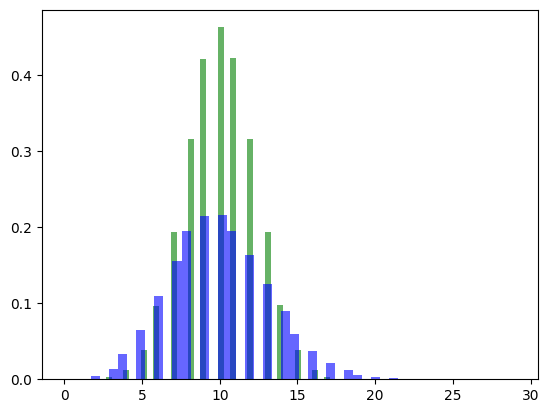

In [107]:
# simulation
n_experiments = 1000000
tails = r.binomial(rolls, p_coin, n_experiments)
targets = r.poisson(lam, n_experiments)
print(f'simulated mean tails= {np.mean(tails)} ± {np.std(tails)} , mean target= {np.mean(targets)} ± {np.std(targets)}')
diffs = tails - targets
mean_diff = np.mean(tails) - np.mean(targets)
std_diff = np.std(diffs)
z_score = mean_diff / std_diff
print(f"Simulated mean difference: {mean_diff:.2f} ± {std_diff:.2f}")
print(f"Simulated Z-score: {z_score:.2f}")
p_tails_bigger = np.mean(diffs > 0)
print(f"Probability tails > targets: {p_tails_bigger:.4f}")
p_targets_bigger = np.mean(diffs < 0)
print(f"Probability targets > tails: {p_targets_bigger:.4f}")
# plot
plt.hist(tails, bins=50, density=True, alpha=0.6, color='g')
plt.hist(targets, bins=50, density=True, alpha=0.6, color='b');



# Problem 2
### 2.1

In [108]:
import sympy as sp

#symbolic error propagation
x, y = sp.symbols('x y')
sx,sy = sp.symbols('sigma_x sigma_y')
z = sp.cos(x**2) / sp.ln(x*y)

dz_dx = sp.diff(z, x)
dz_dy = sp.diff(z, y)

sigma_z = sp.sqrt((dz_dx * sx)**2 + (dz_dy * sy)**2)
sp.simplify(sigma_z)

#numbers
x_val = 1.71
y_val = 10.1
sx_val = 0.05
sy_val = 0.3

z_val = z.evalf(subs={x: x_val, y: y_val})
sigma_z_val = sigma_z.evalf(subs={x: x_val, y: y_val, sx: sx_val, sy: sy_val})
print(f"z = {z_val:.5f} ± {sigma_z_val:.5f}")

#add linear correlation
#symbolic error propagation with correlation
rho = sp.symbols('rho')
covxy = rho * sx * sy
sigma_z_corr = sp.sqrt((dz_dx * sx)**2 + (dz_dy * sy)**2 + 2 * dz_dx * dz_dy * covxy)

#numbers

rho_val = 0.87

covxy = rho_val * sx_val * sy_val
sigma_z_corr_val = sigma_z_corr.evalf(subs={x: x_val, y: y_val, sx: sx_val, sy: sy_val, rho: rho_val})
print(f"With correlation (rho={rho_val}), z = {z_val:.5f} ± {sigma_z_corr_val:.5f}")


z = -0.34273 ± 0.01009
With correlation (rho=0.87), z = -0.34273 ± 0.00657


### 2.2

In [109]:

dataframe = pd.read_csv('data_WaterDensity.csv', header=0)
temp, density = dataframe.values.T
dataframe

,# Temp,Density
0,0.2,0.999854
1,0.2,0.999857
2,0.2,0.999867
3,0.2,0.999858
4,0.2,0.999833
...,...,...
95,7.8,0.999865
96,7.8,0.999861
97,7.8,0.999863
98,7.8,0.999865


Temperature 0.2: Mean = 0.999855 ± 0.000003
Temperature 2.3: Mean = 0.999952 ± 0.000003
Temperature 3.9: Mean = 0.999972 ± 0.000003
Temperature 5.9: Mean = 0.999951 ± 0.000004
Temperature 7.8: Mean = 0.999865 ± 0.000004


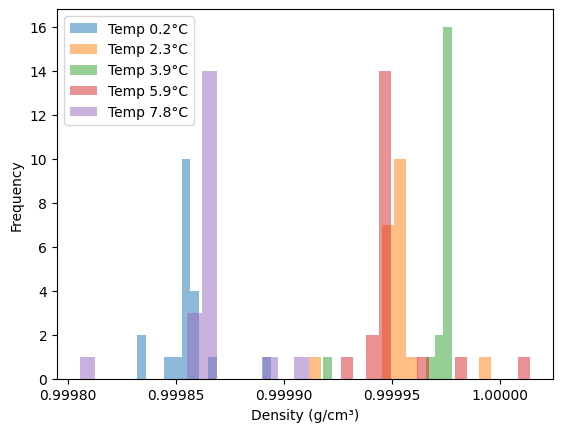

In [128]:
# Group densities by temperature using np.unique
unique_temps = np.unique(temp)

# Create list of density arrays for each temperature
density_groups = [density[temp == t] for t in unique_temps]

# Display the groups
# for i, t in enumerate(unique_temps):
#     print(f"Temperature {t}: {density_groups[i]}")
#     print(f"  Mean: {np.mean(density_groups[i]):.6f}, Std: {np.std(density_groups[i], ddof=1):.6f}\n")
# calc means and stds
means = [np.mean(density_groups[i]) for i in range(len(unique_temps))]
stds = [np.std(density_groups[i], ddof=1) for i in range(len(unique_temps))]
err = [stds[i]/np.sqrt(len(density_groups[i])) for i in range(len(unique_temps))]
# print results
for i, t in enumerate(unique_temps):
    print(f"Temperature {t}: Mean = {means[i]:.6f} ± {err[i]:.6f}")


#plot the different groups
for i, t in enumerate(unique_temps):
    plt.hist(density_groups[i], bins=15, alpha=0.5, label=f'Temp {t}°C')
plt.xlabel('Density (g/cm³)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [130]:
from scipy.stats import norm

def iterative_chauvenet_clip(data):
    """
    Iteratively remove outliers using Chauvenet's criterion.
    Rejects a point if probability of deviation >= observed is < 1/(2N)
    """
    data = np.asarray(data, dtype=float)

    while len(data) > 2:
        N = len(data)
        mu = np.mean(data)
        sigma = np.std(data, ddof=1)

        if sigma == 0:
            break

        # Calculate z-scores for all points
        distances = np.abs(data - mu)
        idx = np.argmax(distances)
        
        z = distances[idx] / sigma
        # Two-sided probability
        p_value = 2 * (1 - norm.cdf(z))
        
        # Chauvenet's criterion: reject if p_value < 1/(2N)
        chauvenet_threshold = 1 / (2 * N)
        
        if p_value < chauvenet_threshold:
            print(
                f"Removed value = {data[idx]:.6g}, "
                f"z = {z:.3f}σ, "
                f"p = {p_value:.3e}, "
                f"threshold = {chauvenet_threshold:.3e}"
            )
            data = np.delete(data, idx)
        else:
            break

    return data



--- Temperature 0.2°C ---
Original data: N = 20
Removed value = 0.999894, z = 3.188σ, p = 1.433e-03, threshold = 2.500e-02
Removed value = 0.999832, z = 2.566σ, p = 1.029e-02, threshold = 2.632e-02
Removed value = 0.999833, z = 3.239σ, p = 1.199e-03, threshold = 2.778e-02
Removed value = 0.999867, z = 2.876σ, p = 4.034e-03, threshold = 2.941e-02
Removed value = 0.999847, z = 2.886σ, p = 3.898e-03, threshold = 3.125e-02
Removed value = 0.999851, z = 2.495σ, p = 1.259e-02, threshold = 3.333e-02
Cleaned data: N = 14
Mean = 0.9998557 ± 0.0000004


--- Temperature 2.3°C ---
Original data: N = 20
Removed value = 0.999996, z = 3.144σ, p = 1.664e-03, threshold = 2.500e-02
Removed value = 0.999912, z = 4.004σ, p = 6.222e-05, threshold = 2.632e-02
Removed value = 0.999958, z = 2.253σ, p = 2.424e-02, threshold = 2.778e-02
Cleaned data: N = 17
Mean = 0.9999518 ± 0.0000005


--- Temperature 3.9°C ---
Original data: N = 20
Removed value = 0.999918, z = 4.200σ, p = 2.673e-05, threshold = 2.500e-02
R

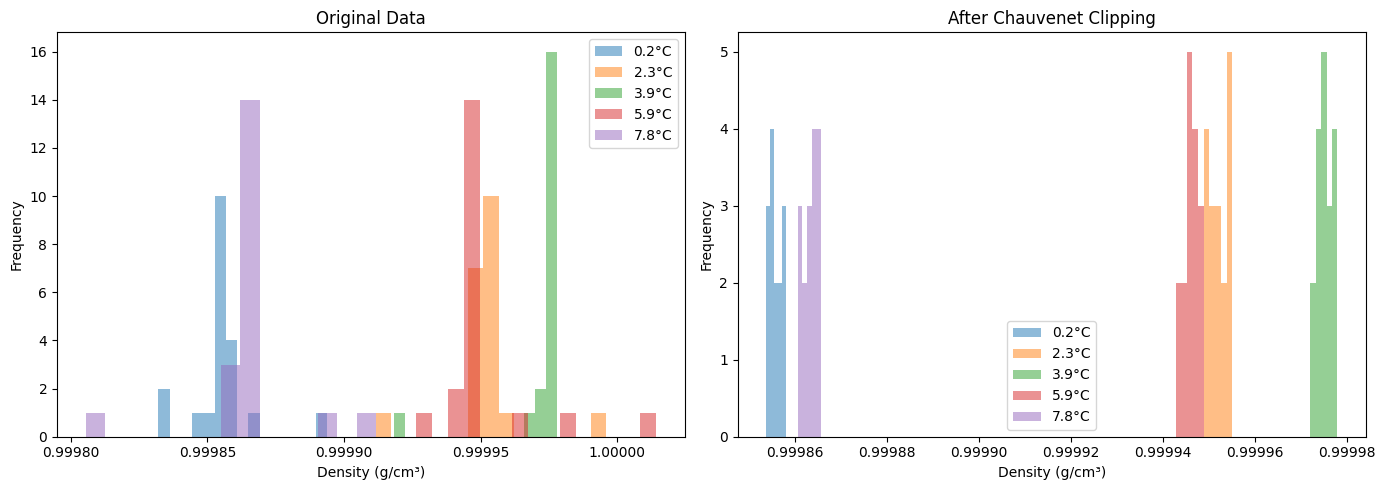

In [135]:
# Apply Chauvenet's criterion to each temperature group
cleaned_groups = []
cleaned_means = []
cleaned_stds = []
cleaned_errs = []

for i, t in enumerate(unique_temps):
    print(f"\n--- Temperature {t}°C ---")
    print(f"Original data: N = {len(density_groups[i])}")
    
    # Apply Chauvenet's criterion
    cleaned_data = iterative_chauvenet_clip(density_groups[i])
    cleaned_groups.append(cleaned_data)
    
    # Calculate statistics on cleaned data
    mean = np.mean(cleaned_data)
    std = np.std(cleaned_data, ddof=1)
    err = std / np.sqrt(len(cleaned_data))
    
    cleaned_means.append(mean)
    cleaned_stds.append(std)
    cleaned_errs.append(err)
    
    print(f"Cleaned data: N = {len(cleaned_data)}")
    print(f"Mean = {mean:.7f} ± {err:.7f}\n")

# Plot cleaned vs original
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Original data
for i, t in enumerate(unique_temps):
    ax1.hist(density_groups[i], bins=15, alpha=0.5, label=f'{t}°C')
ax1.set_xlabel('Density (g/cm³)')
ax1.set_ylabel('Frequency')
ax1.set_title('Original Data')
ax1.legend()

# Cleaned data
for i, t in enumerate(unique_temps):
    ax2.hist(cleaned_groups[i], bins=5, alpha=0.5, label=f'{t}°C')
ax2.set_xlabel('Density (g/cm³)')
ax2.set_ylabel('Frequency')
ax2.set_title('After Chauvenet Clipping')
ax2.legend()

plt.tight_layout()
plt.show()

In [136]:
# Find temperature with highest mean density
max_idx = np.argmax(cleaned_means)
max_temp = unique_temps[max_idx]

print(f"Highest density at temperature: {max_temp}°C")
print(f"Mean density: {cleaned_means[max_idx]:.6f} ± {cleaned_errs[max_idx]:.6f}")

# Check if highest is significantly higher than others
print("\n--- Difference in standard deviations ---")
for i, t in enumerate(unique_temps):
    if i != max_idx:
        diff = cleaned_means[max_idx] - cleaned_means[i]
        combined_err = np.sqrt(cleaned_errs[max_idx]**2 + cleaned_errs[i]**2)
        z_score = diff / combined_err
        print(f"{max_temp}°C - {t}°C: Δ={diff:.6f}, σ_combined={combined_err:.6f}, Z={z_score:.2f}")
        if z_score > 2:
            print(f"  → Significantly higher (>2σ)")



Highest density at temperature: 3.9°C
Mean density: 0.999975 ± 0.000000

--- Difference in standard deviations ---
3.9°C - 0.2°C: Δ=0.000119, σ_combined=0.000001, Z=226.46
  → Significantly higher (>2σ)
3.9°C - 2.3°C: Δ=0.000023, σ_combined=0.000001, Z=37.39
  → Significantly higher (>2σ)
3.9°C - 5.9°C: Δ=0.000029, σ_combined=0.000001, Z=50.75
  → Significantly higher (>2σ)
3.9°C - 7.8°C: Δ=0.000112, σ_combined=0.000001, Z=203.52
  → Significantly higher (>2σ)


Text(0.5, 1.0, 'Mean Water Density vs Temperature with cleaned data')

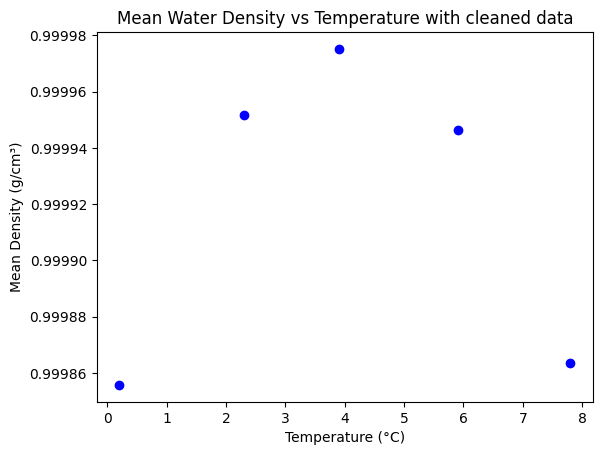

In [140]:
plt.scatter(unique_temps, cleaned_means, color='blue', label='Mean Densities')

plt.xlabel('Temperature (°C)')
plt.ylabel('Mean Density (g/cm³)')
plt.title('Mean Water Density vs Temperature with cleaned data')

In [145]:
def func_water_density(x, a,b, c):
    return a + b*x + c * x**2

cfit = cost.LeastSquares(unique_temps, cleaned_means, cleaned_errs, func_water_density)
m = Minuit(cfit, a=1.0, b=0.0, c=-8e-6)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 27.16 (χ²/ndof = 13.6)     │              Nfcn = 66               │
│ EDM = 7.25e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │999.8435e-3│ 0.0004e-3 │            │            │         │         │       │
│ 1 │ b    │ 64.89e-6  │  0.24e-6  │            │            │         │         │       │
│ 2 │ c    │ -8.001e-6 │ 0.029e-6  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         a         b         c │
├───┼───────────────────────────────┤
│ a │  1.55e-13 -0.07e-12   6.6e-15 │
│ b │ -0.07e-12  5.56e-14  -6.5e-15 │
│ c │   6.6e-15  -6.5e-15  8.27e-16 │
└───┴───────────────────────────────┘

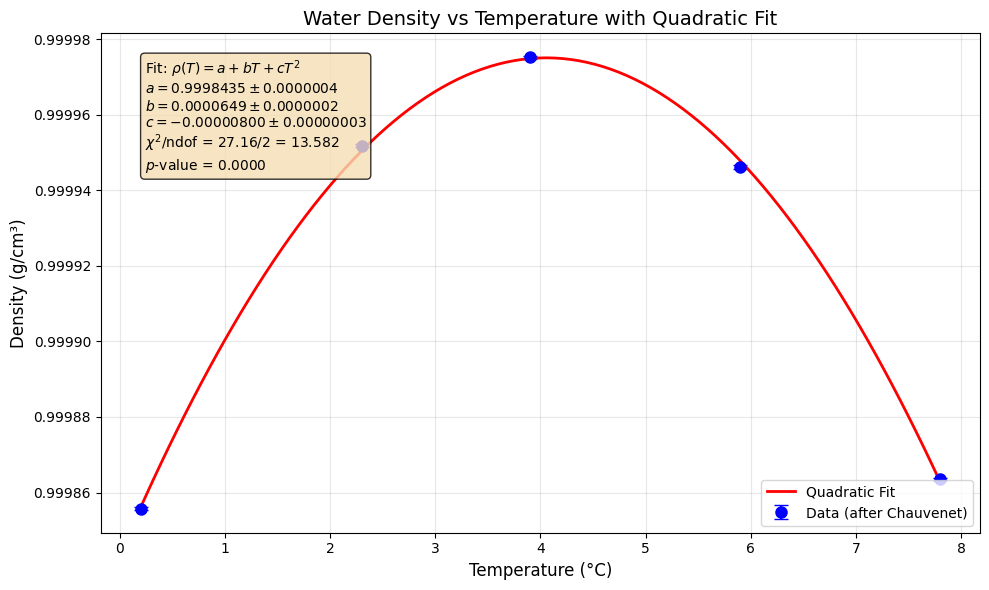


=== Fit Results ===
a = 9.998e-01 ± 3.935e-07
b = 6.489228e-05 ± 2.357527e-07
c = -8.000792e-06 ± 2.875159e-08

χ² = 27.16
ndof = 2
χ²/ndof = 13.582
p-value = 0.0000


In [161]:

# Get fit results
a_fit = m.values['a']
b_fit = m.values['b']
c_fit = m.values['c']
a_err = m.errors['a']
b_err = m.errors['b']
c_err = m.errors['c']

# Calculate chi-square statistics
chi2 = m.fval
ndof = len(unique_temps) - m.nfit
chi2_ndof = chi2 / ndof
p_value = stats.chi2.sf(chi2, ndof)

# Create smooth curve for plotting
temp_smooth = np.linspace(unique_temps.min(), unique_temps.max(), 200)
density_fit = func_water_density(temp_smooth, a_fit, b_fit, c_fit)

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(unique_temps, cleaned_means, yerr=cleaned_errs, 
             fmt='o', color='blue', markersize=8, capsize=5, 
             label='Data (after Chauvenet)')
plt.plot(temp_smooth, density_fit, 'r-', linewidth=2, label='Quadratic Fit')

# Create legend text
legend_text = (
    f'Fit: $\\rho(T) = a + bT + cT^2$\n'
    f'$a = {a_fit:.7f} \\pm {a_err:.7f}$\n'
    f'$b = {b_fit:.7f} \\pm {b_err:.7f}$\n'
    f'$c = {c_fit:.8f} \\pm {c_err:.8f}$\n'
    f'$\\chi^2$/ndof = {chi2:.2f}/{ndof} = {chi2_ndof:.3f}\n'
    f'$p$-value = {p_value:.4f}'
)

plt.text(0.05, 0.95, legend_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Density (g/cm³)', fontsize=12)
plt.title('Water Density vs Temperature with Quadratic Fit', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print fit summary
print(f"\n=== Fit Results ===")
print(f"a = {a_fit:.3e} ± {a_err:.3e}")
print(f"b = {b_fit:.6e} ± {b_err:.6e}")
print(f"c = {c_fit:.6e} ± {c_err:.6e}")
print(f"\nχ² = {chi2:.2f}")
print(f"ndof = {ndof}")
print(f"χ²/ndof = {chi2_ndof:.3f}")
print(f"p-value = {p_value:.4f}")

This is visually a good fit, but as we only have 5 points and 3 params, the p value is very low. I would thus argue that we cant reject that the formuala is correct without getting more points.


=== Maximum Density from Fit ===
Temperature at maximum density: T_max = 4.06 ± 0.02 °C
Maximum density: ρ_max = 0.999975 ± 0.000001 g/cm³


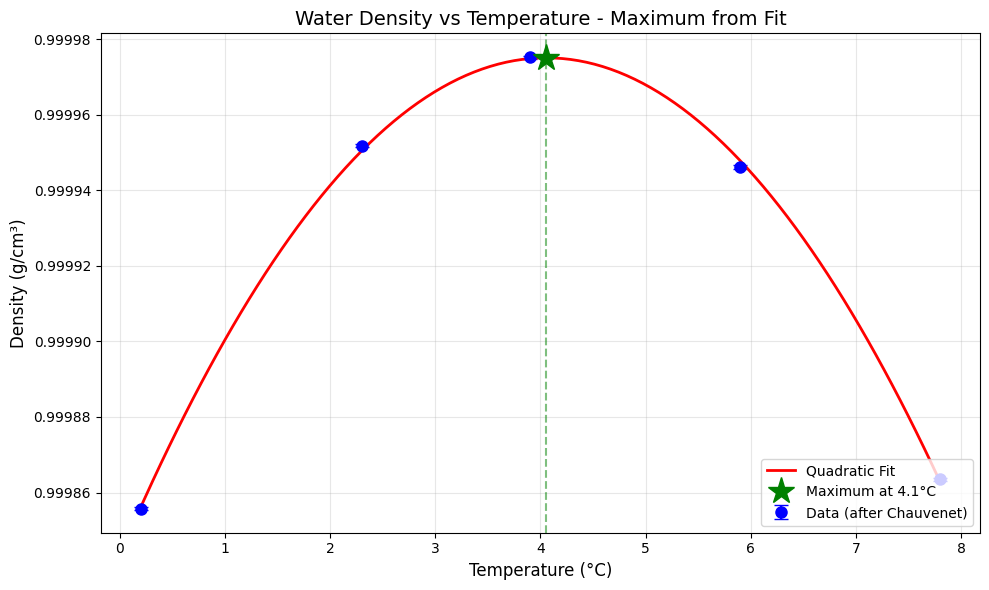

In [162]:
# Find temperature with maximum density from the fit
# For ρ(T) = a + bT + cT², the maximum occurs at dρ/dT = 0
# dρ/dT = b + 2cT = 0  →  T_max = -b/(2c)

T_max = -b_fit / (2 * c_fit)

# Calculate the maximum density value
rho_max = func_water_density(T_max, a_fit, b_fit, c_fit)

# Propagate uncertainty using error propagation
# σ(T_max)² = (∂T_max/∂b)² σ_b² + (∂T_max/∂c)² σ_c²
# ∂T_max/∂b = -1/(2c)
# ∂T_max/∂c = b/(2c²)

dTmax_db = -1 / (2 * c_fit)
dTmax_dc = b_fit / (2 * c_fit**2)

sigma_Tmax = np.sqrt((dTmax_db * b_err)**2 + (dTmax_dc * c_err)**2)

# Propagate uncertainty for rho_max
# dρ/da = 1, dρ/db = T_max, dρ/dc = T_max²
drho_da = 1
drho_db = T_max
drho_dc = T_max**2

sigma_rho_max = np.sqrt(
    (drho_da * a_err)**2 + 
    (drho_db * b_err)**2 + 
    (drho_dc * c_err)**2
)

print(f"\n=== Maximum Density from Fit ===")
print(f"Temperature at maximum density: T_max = {T_max:.2f} ± {sigma_Tmax:.2f} °C")
print(f"Maximum density: ρ_max = {rho_max:.6f} ± {sigma_rho_max:.6f} g/cm³")

# Visualize on plot
plt.figure(figsize=(10, 6))
plt.errorbar(unique_temps, cleaned_means, yerr=cleaned_errs, 
             fmt='o', color='blue', markersize=8, capsize=5, 
             label='Data (after Chauvenet)')
plt.plot(temp_smooth, density_fit, 'r-', linewidth=2, label='Quadratic Fit')

# Mark the maximum
plt.plot(T_max, rho_max, 'g*', markersize=20, label=f'Maximum at {T_max:.1f}°C', zorder=10)
plt.axvline(T_max, color='green', linestyle='--', alpha=0.5)

plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Density (g/cm³)', fontsize=12)
plt.title('Water Density vs Temperature - Maximum from Fit', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.3

In [166]:
#analytical
beta,beta_err = sp.symbols('beta sigma_beta')
lorentz = 1 / sp.sqrt(1 - beta**2)
lorentz_dbeta = sp.diff(lorentz, beta)
sigma_lorentz = lorentz_dbeta * beta_err

#numbers
beta_val = 0.50
beta_err_val = 0.02
lorentz_val = lorentz.evalf(subs={beta: beta_val})
sigma_lorentz_val = sigma_lorentz.evalf(subs={beta: beta_val, beta_err: beta_err_val})
print(f"Lorentz factor γ = {lorentz_val:.5f} ± {sigma_lorentz_val:.5f}")

beta_val2 = 0.95
lorentz_val2 = lorentz.evalf(subs={beta: beta_val2})
sigma_lorentz_val2 = sigma_lorentz.evalf(subs={beta: beta_val2, beta_err: beta_err_val})
print(f"Lorentz factor γ = {lorentz_val2:.5f} ± {sigma_lorentz_val2:.5f}")


Lorentz factor γ = 1.15470 ± 0.01540
Lorentz factor γ = 3.20256 ± 0.62409


In [167]:
# For β = 0.95, calculate asymmetric uncertainties
beta_val2 = 0.95
beta_err_val = 0.02

# Calculate γ at β ± σ_β
beta_low = beta_val2 - beta_err_val
beta_high = beta_val2 + beta_err_val

gamma_center = 1 / np.sqrt(1 - beta_val2**2)
gamma_low = 1 / np.sqrt(1 - beta_low**2)
gamma_high = 1 / np.sqrt(1 - beta_high**2)

# Asymmetric uncertainties
sigma_low = gamma_center - gamma_low
sigma_high = gamma_high - gamma_center

print(f"\n=== Asymmetric Uncertainty Analysis (β = {beta_val2}) ===")
print(f"γ = {gamma_center:.4f} + {sigma_high:.4f} - {sigma_low:.4f}")
print(f"\nSymmetric (linear approximation): γ = {lorentz_val2:.5f} ± {sigma_lorentz_val2:.5f}")
print(f"Note: At high β, linear approximation underestimates the uncertainty!")


=== Asymmetric Uncertainty Analysis (β = 0.95) ===
γ = 3.2026 + 0.9109 - 0.4819

Symmetric (linear approximation): γ = 3.20256 ± 0.62409
Note: At high β, linear approximation underestimates the uncertainty!


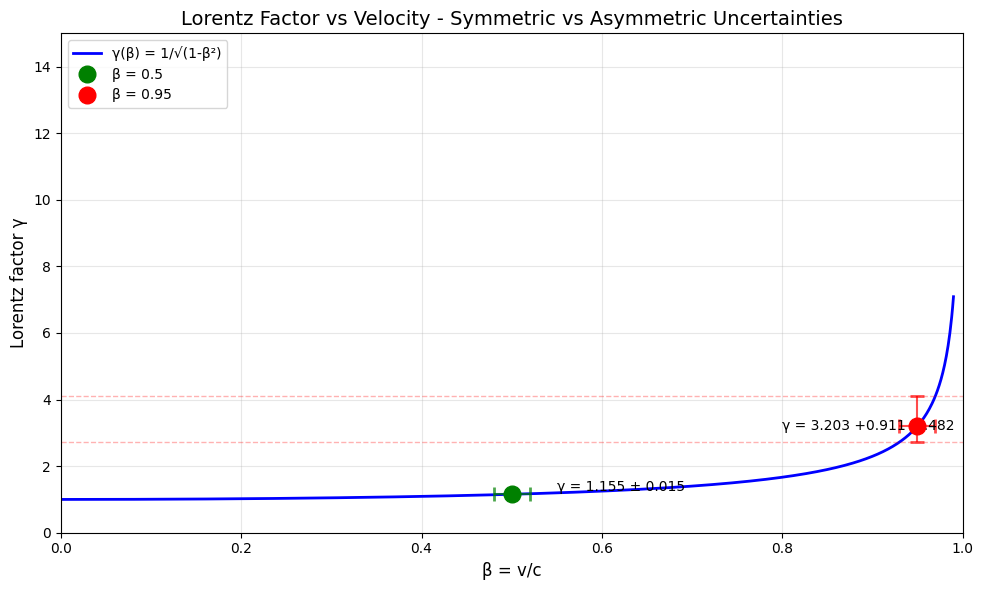


=== Comparison ===
At β = 0.5:
  Symmetric uncertainty: ±0.0154

At β = 0.95:
  Symmetric (linear approx): ±0.6241
  Asymmetric (exact): +0.9109 / -0.4819
  Asymmetry ratio: 1.89


In [168]:
# Plot the Lorentz factor function
beta_range = np.linspace(0, 0.99, 1000)
gamma_range = 1 / np.sqrt(1 - beta_range**2)

plt.figure(figsize=(10, 6))
plt.plot(beta_range, gamma_range, 'b-', linewidth=2, label='γ(β) = 1/√(1-β²)')

# Mark β = 0.50
beta_val = 0.50
gamma_val = 1 / np.sqrt(1 - beta_val**2)
plt.plot(beta_val, gamma_val, 'go', markersize=12, label=f'β = {beta_val}', zorder=5)
plt.errorbar(beta_val, gamma_val, xerr=beta_err_val, 
             fmt='go', capsize=5, capthick=2, alpha=0.7)

# Mark β = 0.95 with asymmetric error bars
plt.plot(beta_val2, gamma_center, 'ro', markersize=12, label=f'β = {beta_val2}', zorder=5)
# Plot asymmetric error bars
plt.errorbar(beta_val2, gamma_center, 
             xerr=[[beta_err_val], [beta_err_val]],
             yerr=[[sigma_low], [sigma_high]],
             fmt='ro', capsize=5, capthick=2, alpha=0.7)

# Add horizontal lines to show asymmetry
plt.axhline(gamma_low, color='red', linestyle='--', alpha=0.3, linewidth=1)
plt.axhline(gamma_high, color='red', linestyle='--', alpha=0.3, linewidth=1)

# Annotations
plt.text(beta_val + 0.05, gamma_val, 
         f'γ = {gamma_val:.3f} ± {float(sigma_lorentz_val):.3f}', 
         fontsize=10, verticalalignment='bottom')
plt.text(beta_val2 - 0.15, gamma_center, 
         f'γ = {gamma_center:.3f} +{sigma_high:.3f} -{sigma_low:.3f}', 
         fontsize=10, verticalalignment='center')

plt.xlabel('β = v/c', fontsize=12)
plt.ylabel('Lorentz factor γ', fontsize=12)
plt.title('Lorentz Factor vs Velocity - Symmetric vs Asymmetric Uncertainties', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 15)
plt.tight_layout()
plt.show()

print(f"\n=== Comparison ===")
print(f"At β = {beta_val}:")
print(f"  Symmetric uncertainty: ±{float(sigma_lorentz_val):.4f}")
print(f"\nAt β = {beta_val2}:")
print(f"  Symmetric (linear approx): ±{float(sigma_lorentz_val2):.4f}")
print(f"  Asymmetric (exact): +{sigma_high:.4f} / -{sigma_low:.4f}")
print(f"  Asymmetry ratio: {sigma_high/sigma_low:.2f}")

we ca see the function is much steeper as we approach light speeds. On the plot we can clearly see that for beta = 0.95, if we increase a little, we will have a massive increase in lorentz factor. Thus the error propagation cannot be assumed to be linear.

# Problem 3
### 3.1

=== Random Harmonic Series Statistics ===
N = 25, Number of experiments = 10000
Mean: -0.0049
Std Dev: 1.2767
Median: -0.0047
Min: -3.1343
Max: 3.2581


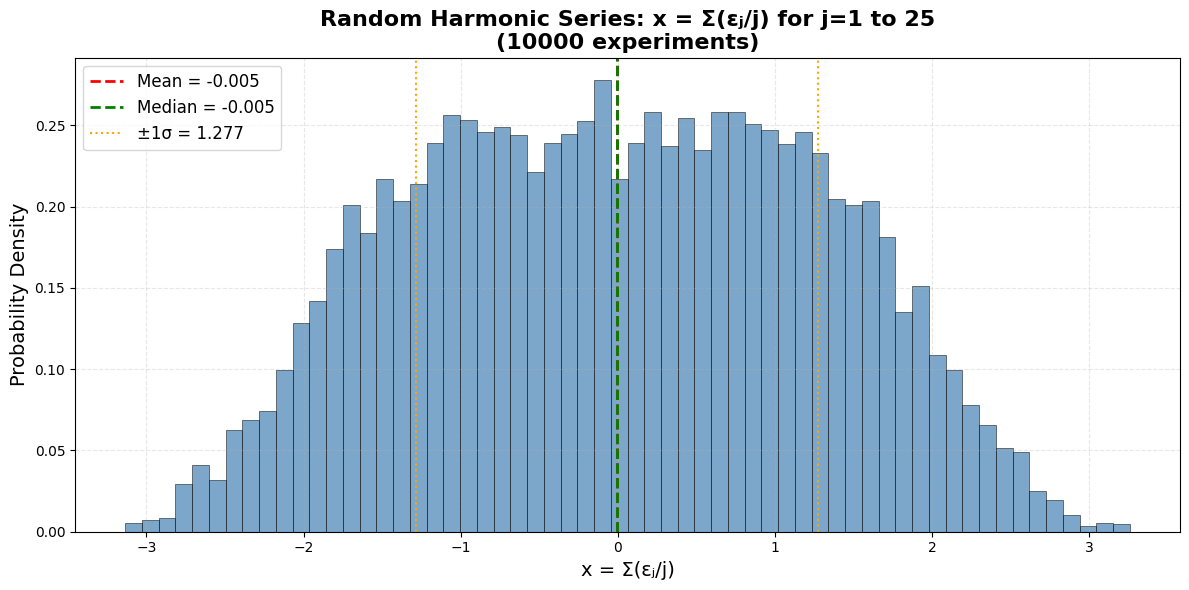

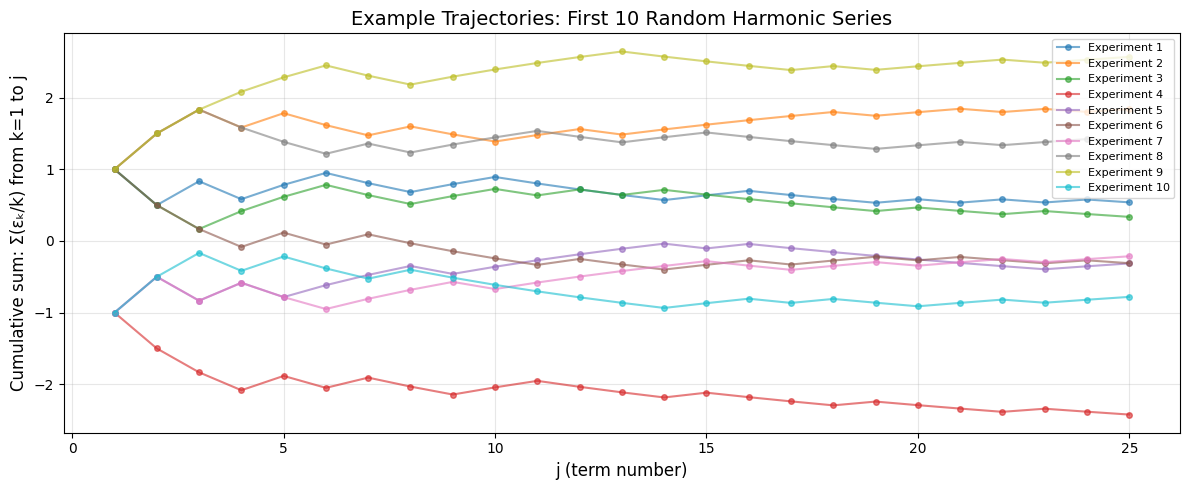

In [174]:

N_harmonic = 25
n_exp = 10000

epsilon = r.choice([-1, 1], size=(n_exp, N_harmonic))


j_values = np.arange(1, N_harmonic + 1)


x_values = np.sum(epsilon / j_values, axis=1)

# Statistics
mean_x = np.mean(x_values)
std_x = np.std(x_values)
median_x = np.median(x_values)

print(f"=== Random Harmonic Series Statistics ===")
print(f"N = {N_harmonic}, Number of experiments = {n_exp}")
print(f"Mean: {mean_x:.4f}")
print(f"Std Dev: {std_x:.4f}")
print(f"Median: {median_x:.4f}")
print(f"Min: {np.min(x_values):.4f}")
print(f"Max: {np.max(x_values):.4f}")

# Create beautiful histogram
plt.figure(figsize=(12, 6))

# Plot histogram
counts, bins, patches = plt.hist(x_values, bins=60, density=True, 
                                  alpha=0.7, color='steelblue', 
                                  edgecolor='black', linewidth=0.5)

# Add statistics lines
plt.axvline(mean_x, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_x:.3f}')
plt.axvline(median_x, color='green', linestyle='--', linewidth=2, label=f'Median = {median_x:.3f}')
plt.axvline(mean_x + std_x, color='orange', linestyle=':', linewidth=1.5, label=f'±1σ = {std_x:.3f}')
plt.axvline(mean_x - std_x, color='orange', linestyle=':', linewidth=1.5)

# Labels and title
plt.xlabel('x = Σ(εⱼ/j)', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title(f'Random Harmonic Series: x = Σ(εⱼ/j) for j=1 to {N_harmonic}\n({n_exp} experiments)', 
          fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Additional plot: Show individual experiment examples
fig, ax = plt.subplots(figsize=(12, 5))

# Plot first 5 experiments as examples
for i in range(10):
    cumsum = np.cumsum(epsilon[i] / j_values)
    ax.plot(j_values, cumsum, alpha=0.6, marker='o', markersize=4, label=f'Experiment {i+1}')

ax.set_xlabel('j (term number)', fontsize=12)
ax.set_ylabel('Cumulative sum: Σ(εₖ/k) from k=1 to j', fontsize=12)
ax.set_title('Example Trajectories: First 10 Random Harmonic Series', fontsize=14)
ax.legend(loc = 'upper right', fontsize=8)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



=== Symmetry Tests ===

Mean: -0.004940
Median: -0.004737

Skewness: -0.001660
(Perfectly symmetric distribution has skewness = 0)

Skewness test:
  Z-score: -0.0678
  p-value: 0.945934
  → Cannot reject H0: Distribution is symmetric (skewness = 0)

=== Count Analysis ===
Positive values: 4988 (49.88%)
Negative values: 5012 (50.12%)
Zero values: 0

Binomial test (H0: P(x>0) = 0.5):
  p-value: 0.818093
  → Cannot reject H0: Equal probability of positive/negative


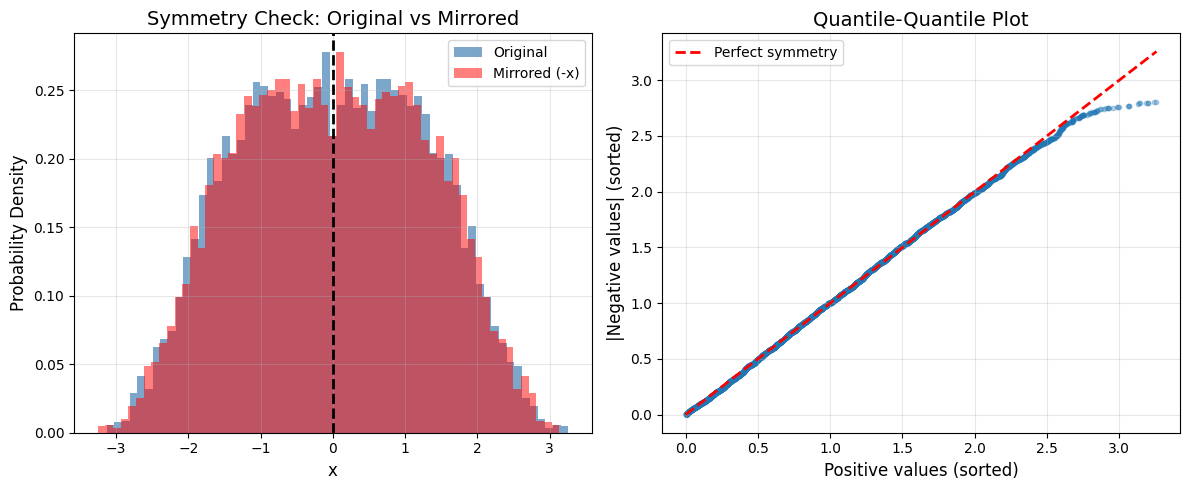

In [181]:
# Test for symmetry around 0

print("=== Symmetry Tests ===\n")

# 1. Basic checks
print(f"Mean: {mean_x:.6f}")
print(f"Median: {median_x:.6f}")

# 2. Skewness test
from scipy.stats import skew, skewtest
skewness = skew(x_values)
print(f"\nSkewness: {skewness:.6f}")
print(f"(Perfectly symmetric distribution has skewness = 0)")

# Statistical test for skewness
skew_z, skew_p = skewtest(x_values)
print(f"\nSkewness test:")
print(f"  Z-score: {skew_z:.4f}")
print(f"  p-value: {skew_p:.6f}")
if skew_p > 0.05:
    print("  → Cannot reject H0: Distribution is symmetric (skewness = 0)")
else:
    print("  → Reject H0: Distribution has significant skewness")

# 3. Compare counts of positive vs negative values
n_positive = np.sum(x_values > 0)
n_negative = np.sum(x_values < 0)
n_zero = np.sum(x_values == 0)

print(f"\n=== Count Analysis ===")
print(f"Positive values: {n_positive} ({n_positive/n_exp*100:.2f}%)")
print(f"Negative values: {n_negative} ({n_negative/n_exp*100:.2f}%)")
print(f"Zero values: {n_zero}")

# Binomial test: if symmetric, p(positive) = 0.5
from scipy.stats import binomtest
result = binomtest(n_positive, n_positive + n_negative, 0.5)
print(f"\nBinomial test (H0: P(x>0) = 0.5):")
print(f"  p-value: {result.pvalue:.6f}")
if result.pvalue > 0.05:
    print("  → Cannot reject H0: Equal probability of positive/negative")
else:
    print("  → Reject H0: Unequal probabilities")

# 4. Visual symmetry test
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(x_values, bins=60, density=True, alpha=0.7, color='steelblue', label='Original')
plt.hist(-x_values, bins=60, density=True, alpha=0.5, color='red', label='Mirrored (-x)')
plt.axvline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Symmetry Check: Original vs Mirrored', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Compare quantiles
plt.subplot(1, 2, 2)
sorted_positive = np.sort(x_values[x_values > 0])
sorted_negative = np.sort(-x_values[x_values < 0])  # Take absolute values

# Match lengths
min_len = min(len(sorted_positive), len(sorted_negative))
plt.scatter(sorted_positive[:min_len], sorted_negative[:min_len], alpha=0.3, s=10)
plt.plot([0, max(sorted_positive[:min_len])], [0, max(sorted_positive[:min_len])], 
         'r--', linewidth=2, label='Perfect symmetry')
plt.xlabel('Positive values (sorted)', fontsize=12)
plt.ylabel('|Negative values| (sorted)', fontsize=12)
plt.title('Quantile-Quantile Plot', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== Random Harmonic Series Statistics ===
N = 250, Number of experiments = 10000
Mean: 0.0131
Std Dev: 1.2782
Median: 0.0190
Min: -3.4880
Max: 3.7658


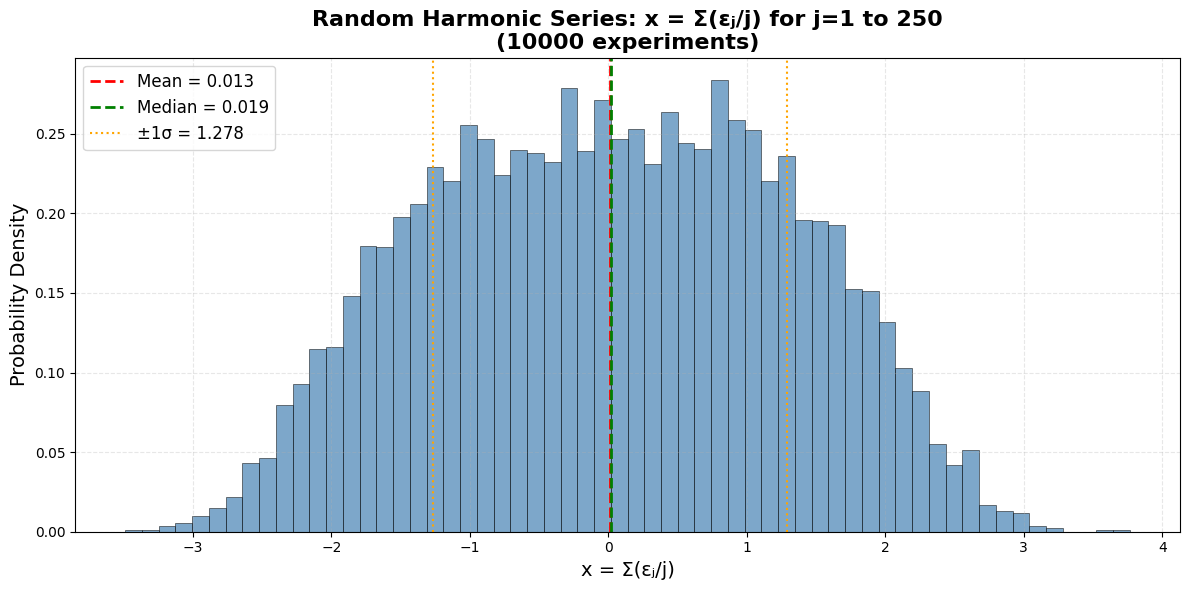

In [182]:

N_harmonic = 250
n_exp = 10000

epsilon = r.choice([-1, 1], size=(n_exp, N_harmonic))


j_values = np.arange(1, N_harmonic + 1)


x_values = np.sum(epsilon / j_values, axis=1)

# Statistics
mean_x = np.mean(x_values)
std_x = np.std(x_values)
median_x = np.median(x_values)

print(f"=== Random Harmonic Series Statistics ===")
print(f"N = {N_harmonic}, Number of experiments = {n_exp}")
print(f"Mean: {mean_x:.4f}")
print(f"Std Dev: {std_x:.4f}")
print(f"Median: {median_x:.4f}")
print(f"Min: {np.min(x_values):.4f}")
print(f"Max: {np.max(x_values):.4f}")

# Create beautiful histogram
plt.figure(figsize=(12, 6))

# Plot histogram
counts, bins, patches = plt.hist(x_values, bins=60, density=True, 
                                  alpha=0.7, color='steelblue', 
                                  edgecolor='black', linewidth=0.5)

# Add statistics lines
plt.axvline(mean_x, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_x:.3f}')
plt.axvline(median_x, color='green', linestyle='--', linewidth=2, label=f'Median = {median_x:.3f}')
plt.axvline(mean_x + std_x, color='orange', linestyle=':', linewidth=1.5, label=f'±1σ = {std_x:.3f}')
plt.axvline(mean_x - std_x, color='orange', linestyle=':', linewidth=1.5)

# Labels and title
plt.xlabel('x = Σ(εⱼ/j)', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title(f'Random Harmonic Series: x = Σ(εⱼ/j) for j=1 to {N_harmonic}\n({n_exp} experiments)', 
          fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()





=== Kolmogorov-Smirnov Test: N=25 vs N=250 ===
H0: Both distributions come from the same underlying distribution
KS statistic: 0.012500
p-value: 0.415380
→ Cannot reject H0: Distributions are consistent


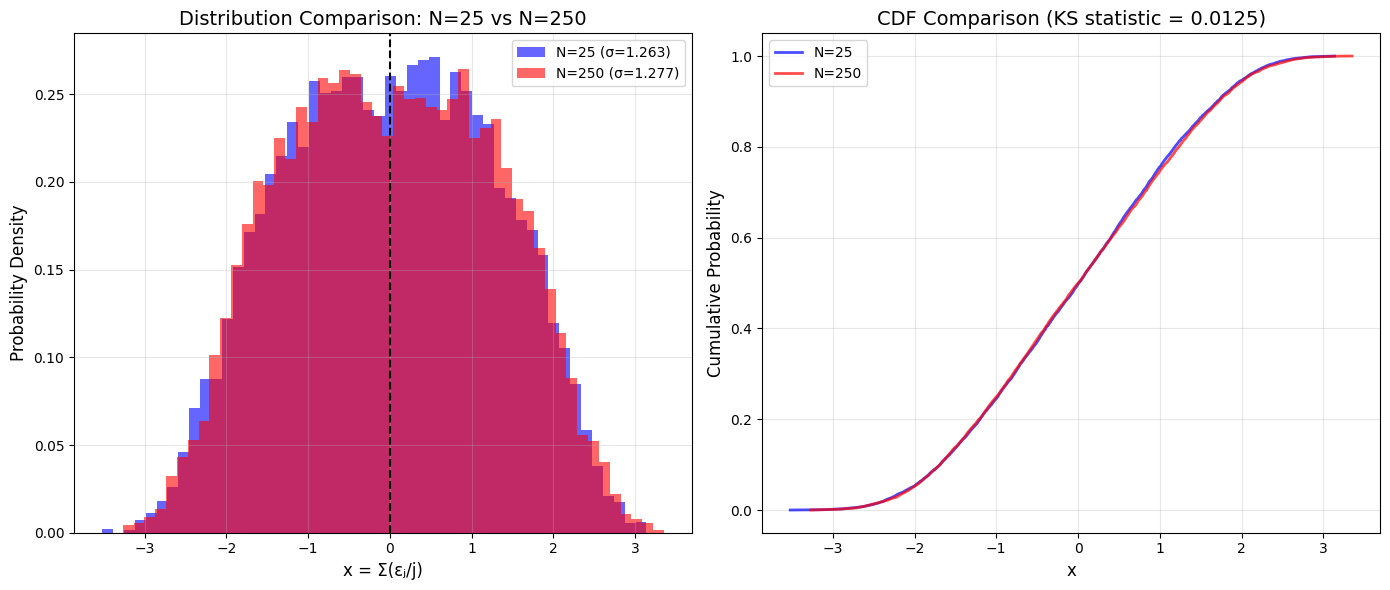


=== Statistics Comparison ===
N=25:  Mean = -0.001738, Std = 1.263219
N=250: Mean = 0.007325, Std = 1.277496

Std Dev ratio: 1.0113


In [183]:
# Compare distributions for N=25 and N=250 using KS test

# First, regenerate N=25 data (save it before running N=250)
N_harmonic_25 = 25
epsilon_25 = r.choice([-1, 1], size=(n_exp, N_harmonic_25))
j_values_25 = np.arange(1, N_harmonic_25 + 1)
x_values_25 = np.sum(epsilon_25 / j_values_25, axis=1)

# N=250 data (already computed)
N_harmonic_250 = 250
epsilon_250 = r.choice([-1, 1], size=(n_exp, N_harmonic_250))
j_values_250 = np.arange(1, N_harmonic_250 + 1)
x_values_250 = np.sum(epsilon_250 / j_values_250, axis=1)

# Kolmogorov-Smirnov test
from scipy.stats import ks_2samp
ks_statistic, ks_pvalue = ks_2samp(x_values_25, x_values_250)

print("=== Kolmogorov-Smirnov Test: N=25 vs N=250 ===")
print(f"H0: Both distributions come from the same underlying distribution")
print(f"KS statistic: {ks_statistic:.6f}")
print(f"p-value: {ks_pvalue:.6f}")
if ks_pvalue > 0.05:
    print("→ Cannot reject H0: Distributions are consistent")
else:
    print("→ Reject H0: Distributions are NOT consistent")

# Visual comparison
plt.figure(figsize=(14, 6))

# Overlapping histograms
plt.subplot(1, 2, 1)
plt.hist(x_values_25, bins=50, density=True, alpha=0.6, color='blue', label=f'N=25 (σ={np.std(x_values_25):.3f})')
plt.hist(x_values_250, bins=50, density=True, alpha=0.6, color='red', label=f'N=250 (σ={np.std(x_values_250):.3f})')
plt.axvline(0, color='black', linestyle='--', linewidth=1.5)
plt.xlabel('x = Σ(εⱼ/j)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution Comparison: N=25 vs N=250', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# CDF comparison
plt.subplot(1, 2, 2)
sorted_25 = np.sort(x_values_25)
sorted_250 = np.sort(x_values_250)
cdf_25 = np.arange(1, len(sorted_25) + 1) / len(sorted_25)
cdf_250 = np.arange(1, len(sorted_250) + 1) / len(sorted_250)

plt.plot(sorted_25, cdf_25, 'b-', linewidth=2, label='N=25', alpha=0.7)
plt.plot(sorted_250, cdf_250, 'r-', linewidth=2, label='N=250', alpha=0.7)
plt.xlabel('x', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.title(f'CDF Comparison (KS statistic = {ks_statistic:.4f})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare statistics
print(f"\n=== Statistics Comparison ===")
print(f"N=25:  Mean = {np.mean(x_values_25):.6f}, Std = {np.std(x_values_25):.6f}")
print(f"N=250: Mean = {np.mean(x_values_250):.6f}, Std = {np.std(x_values_250):.6f}")
print(f"\nStd Dev ratio: {np.std(x_values_250)/np.std(x_values_25):.4f}")

Generating repeated experiments to estimate PDF maximum distribution...

=== Maximum PDF Test (Repeated Sampling) ===
Number of repeated experiments: 1000
Mean of maximum PDF values: 0.2774
Std Dev of maximum PDF values: 0.0076
Standard Error: 0.0002
Theoretical value: 0.25

=== One-Sample t-test ===
H0: Mean of PDF maxima = 0.25
t-statistic: 113.4138
p-value: 0.000000
Degrees of freedom: 999
→ Reject H0: Maximum PDF is NOT consistent with 0.25 (at α=0.05)

95% Confidence Interval: [0.2769, 0.2779]
Does 0.25 fall within CI? False


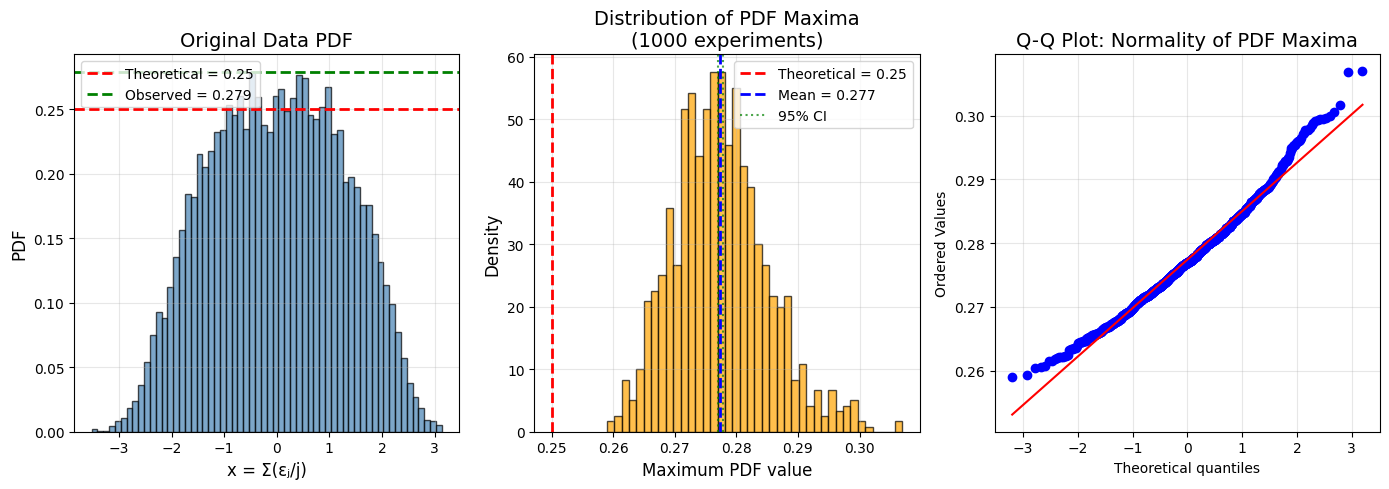


=== Normality Test (Shapiro-Wilk) ===
Statistic: 0.9853
p-value: 0.000000
→ Reject H0: Data may not be normally distributed
  (consider non-parametric test)


In [185]:
# Test if maximum PDF value is consistent with 1/4 (without bootstrap)

# Strategy: Generate multiple experiments, each producing a histogram
# Collect the maximum PDF value from each, then do a t-test

n_samples = 1000  # Number of repeated experiments
max_pdf_values = []

print("Generating repeated experiments to estimate PDF maximum distribution...")

for i in range(n_samples):
    # Generate new data for each experiment
    epsilon_sample = r.choice([-1, 1], size=(n_exp, N_harmonic_25))
    x_sample = np.sum(epsilon_sample / j_values_25, axis=1)
    
    # Get histogram and find maximum PDF
    counts, bins = np.histogram(x_sample, bins=60, density=True)
    max_pdf_values.append(np.max(counts))

max_pdf_values = np.array(max_pdf_values)

# Calculate statistics
mean_max = np.mean(max_pdf_values)
std_max = np.std(max_pdf_values, ddof=1)
se_max = std_max / np.sqrt(n_samples)

print(f"\n=== Maximum PDF Test (Repeated Sampling) ===")
print(f"Number of repeated experiments: {n_samples}")
print(f"Mean of maximum PDF values: {mean_max:.4f}")
print(f"Std Dev of maximum PDF values: {std_max:.4f}")
print(f"Standard Error: {se_max:.4f}")
print(f"Theoretical value: 0.25")

# One-sample t-test: H0: mean of maxima = 0.25
from scipy.stats import ttest_1samp

t_statistic, p_value = ttest_1samp(max_pdf_values, 0.25)

print(f"\n=== One-Sample t-test ===")
print(f"H0: Mean of PDF maxima = 0.25")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"Degrees of freedom: {n_samples - 1}")

if p_value > 0.05:
    print(f"→ Cannot reject H0: Maximum PDF is consistent with 0.25 (at α=0.05)")
else:
    print(f"→ Reject H0: Maximum PDF is NOT consistent with 0.25 (at α=0.05)")

# Calculate confidence interval
from scipy.stats import t as t_dist
ci_level = 0.95
t_critical = t_dist.ppf((1 + ci_level) / 2, n_samples - 1)
ci_lower = mean_max - t_critical * se_max
ci_upper = mean_max + t_critical * se_max

print(f"\n95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Does 0.25 fall within CI? {ci_lower <= 0.25 <= ci_upper}")

# Visualize
plt.figure(figsize=(14, 5))

# Left: Original histogram with observed max
plt.subplot(1, 3, 1)
counts_orig, bins_orig, _ = plt.hist(x_values_25, bins=60, density=True, alpha=0.7, 
                                      color='steelblue', edgecolor='black')
max_pdf_orig = np.max(counts_orig)
plt.axhline(0.25, color='red', linestyle='--', linewidth=2, label='Theoretical = 0.25')
plt.axhline(max_pdf_orig, color='green', linestyle='--', linewidth=2, 
            label=f'Observed = {max_pdf_orig:.3f}')
plt.xlabel('x = Σ(εⱼ/j)', fontsize=12)
plt.ylabel('PDF', fontsize=12)
plt.title('Original Data PDF', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Middle: Distribution of maximum PDF values
plt.subplot(1, 3, 2)
plt.hist(max_pdf_values, bins=40, alpha=0.7, color='orange', edgecolor='black', density=True)
plt.axvline(0.25, color='red', linestyle='--', linewidth=2, label='Theoretical = 0.25')
plt.axvline(mean_max, color='blue', linestyle='--', linewidth=2, 
            label=f'Mean = {mean_max:.3f}')
plt.axvline(ci_lower, color='green', linestyle=':', linewidth=1.5, alpha=0.7)
plt.axvline(ci_upper, color='green', linestyle=':', linewidth=1.5, alpha=0.7,
            label=f'95% CI')
plt.xlabel('Maximum PDF value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title(f'Distribution of PDF Maxima\n({n_samples} experiments)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Right: Q-Q plot for normality check of maxima
plt.subplot(1, 3, 3)
from scipy.stats import probplot
probplot(max_pdf_values, dist="norm", plot=plt)
plt.title('Q-Q Plot: Normality of PDF Maxima', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional normality test (Shapiro-Wilk)
from scipy.stats import shapiro
shapiro_stat, shapiro_p = shapiro(max_pdf_values)
print(f"\n=== Normality Test (Shapiro-Wilk) ===")
print(f"Statistic: {shapiro_stat:.4f}")
print(f"p-value: {shapiro_p:.6f}")
if shapiro_p > 0.05:
    print("→ Cannot reject H0: Data appears normally distributed")
    print("  (t-test is appropriate)")
else:
    print("→ Reject H0: Data may not be normally distributed")
    print("  (consider non-parametric test)")

# Problem 4
### 4.1

In [186]:
dataframe = pd.read_csv('data_BloodPressure.csv', header=0)
ptype, bloodp = dataframe.values.T
dataframe

,# Type,Blood Pressure
0,0,109.5
1,0,123.9
2,0,123.5
3,1,169.7
4,0,114.8
...,...,...
2493,0,125.2
2494,1,154.3
2495,0,119.9
2496,0,126.0


In [193]:
bloodp_healthy = bloodp[ptype == 0]
mean_SBP_healthy = np.mean(bloodp_healthy)
err_SBP_healthy = np.std(bloodp_healthy, ddof=1) / np.sqrt(len(bloodp_healthy))
print(f"Overall Mean SBP = {mean_SBP_healthy:.2f} ± {err_SBP_healthy:.2f} mmHg")

# 95% confidence interval
ci_level = 0.95
t_critical = stats.t.ppf((1 + ci_level) / 2, len(bloodp_healthy) - 1)
ci_lower = mean_SBP_healthy - t_critical * err_SBP_healthy
ci_upper = mean_SBP_healthy + t_critical * err_SBP_healthy
print(f"95% CI for Mean SBP (Healthy): [{ci_lower:.2f}, {ci_upper:.2f}] mmHg")

Overall Mean SBP = 120.66 ± 0.26 mmHg
95% CI for Mean SBP (Healthy): [120.16, 121.17] mmHg


In [201]:
# Calculate ROC curve from two histograms (hist1 is signal, hist2 is background):
def calc_ROC(hist1, hist2) :

    # First we extract the entries (y values) and the edges of the histograms:
    # Note how the "_" is simply used for the rest of what e.g. "hist1" returns (not really of our interest)
    y_sig, x_sig_edges, _ = hist1 
    y_bkg, x_bkg_edges, _ = hist2
    
    # Check that the two histograms have the same x edges:
    if np.array_equal(x_sig_edges, x_bkg_edges) :
        
        # Extract the center positions (x values) of the bins (both signal or background works - equal binning)
        x_centers = 0.5*(x_sig_edges[1:] + x_sig_edges[:-1])
        
        # Calculate the integral (sum) of the signal and background:
        integral_sig = y_sig.sum()
        integral_bkg = y_bkg.sum()
    
        # Initialize empty arrays for the True Positive Rate (TPR) and the False Positive Rate (FPR):
        TPR = np.zeros_like(y_sig) # True positive rate (sensitivity)
        FPR = np.zeros_like(y_sig) # False positive rate ()
        
        # Loop over all bins (x_centers) of the histograms and calculate TN, FP, FN, TP, FPR, and TPR for each bin:
        for i, x in enumerate(x_centers): 
            
            # The cut mask
            cut = (x_centers < x)
            
            # True positive
            TP = np.sum(y_sig[~cut]) / integral_sig    # True positives
            FN = np.sum(y_sig[cut]) / integral_sig     # False negatives
            TPR[i] = TP / (TP + FN)                    # True positive rate
            
            # True negative
            TN = np.sum(y_bkg[cut]) / integral_bkg      # True negatives (background)
            FP = np.sum(y_bkg[~cut]) / integral_bkg     # False positives
            FPR[i] = FP / (FP + TN)                     # False positive rate            
            
        return FPR, TPR
    
    else:
        AssertionError("Signal and Background histograms have different bins and/or ranges")

    #test statistic
    d = abs(bloodp -mean_SBP_healthy)
    

=== Data Summary ===
Healthy (H0): n = 1533
Diseased (H1+H2): n = 965


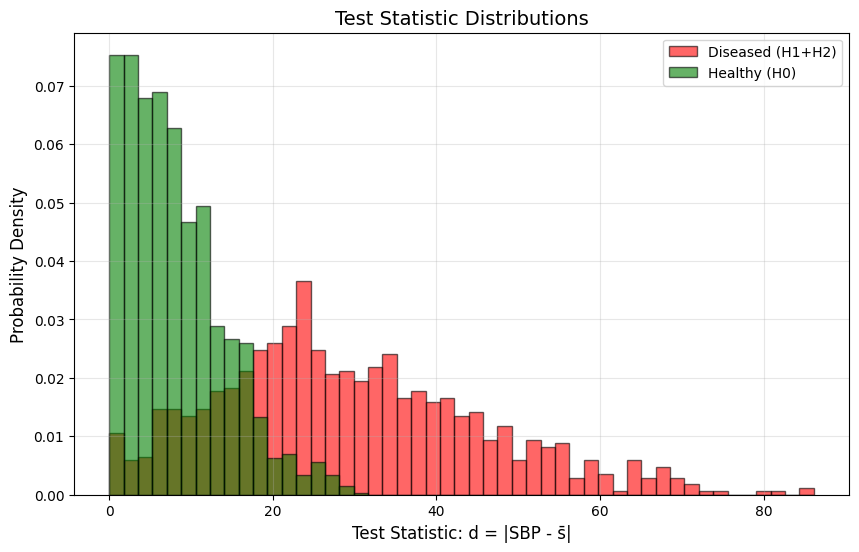

(0.0, 1.0)

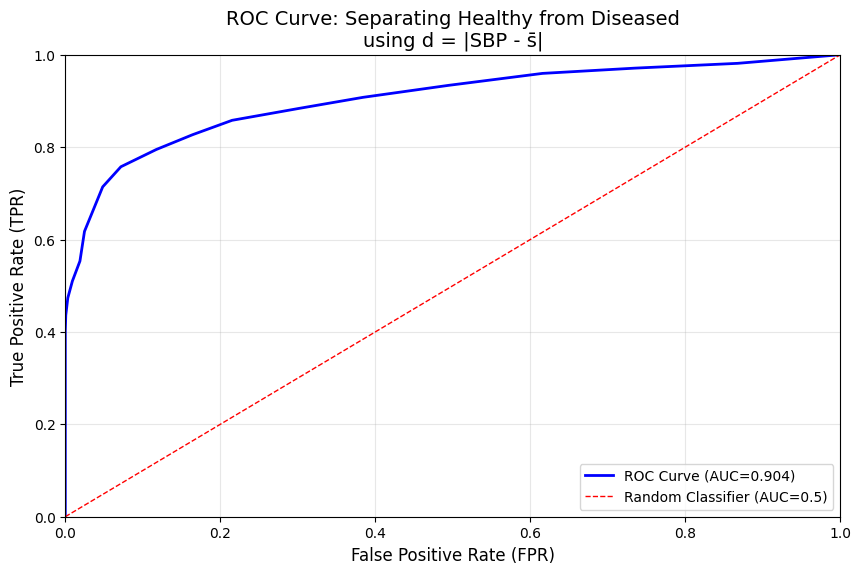

In [215]:

# 4.2: ROC Curve Analysis using test statistic d = |SBP - s̄|

# Separate healthy from diseased patients
healthy_mask = (ptype == 0)
diseased_mask = (ptype == 1) | (ptype == 2)

bloodp_healthy = bloodp[healthy_mask]
bloodp_diseased = bloodp[diseased_mask]

print(f"=== Data Summary ===")
print(f"Healthy (H0): n = {len(bloodp_healthy)}")
print(f"Diseased (H1+H2): n = {len(bloodp_diseased)}")

# Calculate test statistic d = |SBP - mean_healthy|
d_healthy = np.abs(bloodp_healthy - mean_SBP_healthy)
d_diseased = np.abs(bloodp_diseased - mean_SBP_healthy)

# Create histograms for ROC calculation
bins = np.linspace(0, np.max([d_healthy.max(), d_diseased.max()]), 50)

plt.figure(figsize=(10, 6))
hist_diseased = plt.hist(d_diseased, bins=bins, density=True, alpha=0.6, 
                         color='red', label='Diseased (H1+H2)', edgecolor='black')
hist_healthy = plt.hist(d_healthy, bins=bins, density=True, alpha=0.6, 
                        color='green', label='Healthy (H0)', edgecolor='black')
plt.xlabel('Test Statistic: d = |SBP - s̄|', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

plt.title('Test Statistic Distributions', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate ROC curve using the provided function
FPR, TPR = calc_ROC(hist_diseased, hist_healthy)

# Calculate AUC
from sklearn.metrics import auc
roc_auc = auc(FPR, TPR)

# Plot ROC curve
plt.figure(figsize=(10, 6))

# Left: ROC curve

plt.plot(FPR, TPR, 'b-', linewidth=2, label=f'ROC Curve (AUC={roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'r--', linewidth=1, label='Random Classifier (AUC=0.5)')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve: Separating Healthy from Diseased\nusing d = |SBP - s̄|', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])




P(H2 | SBP=98) = P(SBP=98 | H2) × P(H2) / P(SBP=98)

Where:

P(H2 | SBP=98) = Probability patient has H2 given SBP=98 (what we want)
P(SBP=98 | H2) = Likelihood of SBP=98 if patient has H2
P(H2) = Prior probability of having H2 = 0.5 (equal priors)
P(SBP=98) = Total probability of observing SBP=98

In [222]:
# Assuming you have fitted distributions for H0 and H2 from your data
# Extract data for each group
bloodp_h0 = bloodp[ptype == 0]  # Healthy
bloodp_h2 = bloodp[ptype == 2]  # Disease H2

# Fit Gaussian distributions
from scipy.stats import norm

mu_h0 = np.mean(bloodp_h0)
sigma_h0 = np.std(bloodp_h0, ddof=1)

mu_h2 = np.mean(bloodp_h2)
sigma_h2 = np.std(bloodp_h2, ddof=1)

print(f"H0: μ={mu_h0:.2f}, σ={sigma_h0:.2f}")
print(f"H2: μ={mu_h2:.2f}, σ={sigma_h2:.2f}")

# Observed SBP
sbp_obs = 98

# Likelihoods
likelihood_h0 = norm.pdf(sbp_obs, mu_h0, sigma_h0)
likelihood_h2 = norm.pdf(sbp_obs, mu_h2, sigma_h2)

print(f"\nP(SBP=98 | H0) = {likelihood_h0:.6f}")
print(f"P(SBP=98 | H2) = {likelihood_h2:.6f}")

# Priors (equal)
prior_h0 = 0.5
prior_h2 = 0.5

# Total probability P(SBP=98)
p_sbp = likelihood_h0 * prior_h0 + likelihood_h2 * prior_h2

# Posterior probability using Bayes' theorem
posterior_h2 = (likelihood_h2 * prior_h2) / p_sbp
posterior_h0 = (likelihood_h0 * prior_h0) / p_sbp

print(f"\n=== Bayesian Posterior Probabilities ===")
print(f"P(H0 | SBP=98) = {posterior_h0:.4f}")
print(f"P(H2 | SBP=98) = {posterior_h2:.4f}")
print(f"\nInterpretation: Given SBP=98, there's a {posterior_h2*100:.1f}% chance the patient has H2")

H0: μ=120.66, σ=10.05
H2: μ=98.14, σ=6.51

P(SBP=98 | H0) = 0.003116
P(SBP=98 | H2) = 0.061279

=== Bayesian Posterior Probabilities ===
P(H0 | SBP=98) = 0.0484
P(H2 | SBP=98) = 0.9516

Interpretation: Given SBP=98, there's a 95.2% chance the patient has H2


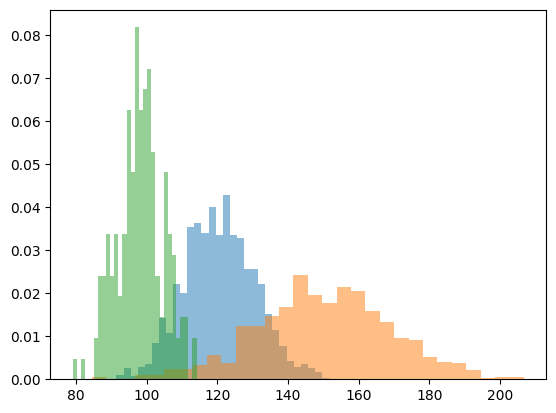

In [224]:
bloodp_h1 = bloodp[ptype == 1]  # Disease H1

plt.hist(bloodp_h0, bins=30, density=True, alpha=0.5, label='H0')
plt.hist(bloodp_h1, bins=30, density=True, alpha=0.5, label='H1')
plt.hist(bloodp_h2, bins=30, density=True, alpha=0.5, label='H2');


In [225]:
# Get histogram counts and bin centers
counts, bin_edges = np.histogram(bloodp_h0, bins=30)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_width = bin_edges[1] - bin_edges[0]

# Uncertainties (Poisson)
counts_err = np.sqrt(counts)
counts_err[counts_err == 0] = 1  # Avoid division by zero

# Define Gaussian PDF scaled by total counts and bin width
def gaussian_hist(x, mu, sigma):
    N_total = len(bloodp_h0)
    return N_total * bin_width * stats.norm.pdf(x, mu, sigma)

# Fit using Minuit
cfit = cost.LeastSquares(bin_centers, counts, counts_err, gaussian_hist)
mfit = Minuit(cfit, mu=120, sigma=10)
mfit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 44.56 (χ²/ndof = 1.6)      │              Nfcn = 37               │
│ EDM = 1.3e-08 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  120.82   │   0.25    │            │            │         │         │       │
│ 1 │ sigma │   9.85    │   0.18    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────┐
│       │     mu  sigma │
├───────┼───────────────┤
│    mu │ 0.0642  0.006 │
│ sigma │  0.006 0.0339 │
└───────┴───────────────┘

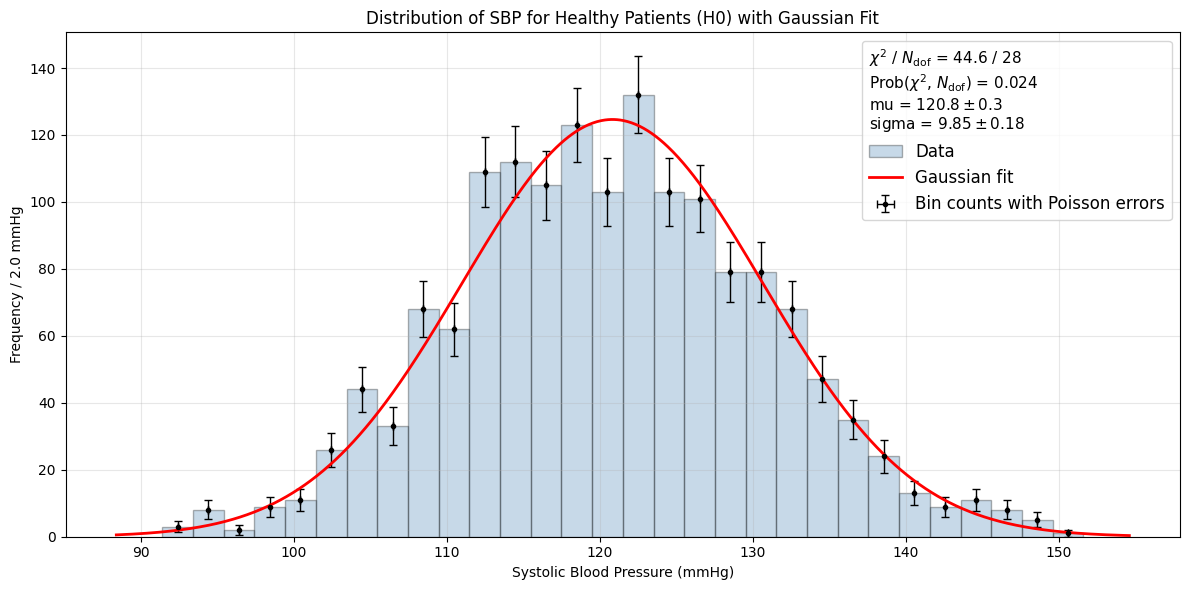

In [227]:
# Create figure and plot histogram with fit
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram as bars (not errorbar)
ax.hist(bloodp_h0, bins=30, alpha=0.3, color='steelblue', edgecolor='black', label='Data')

# Plot bin centers with Poisson errors
ax.errorbar(bin_centers, counts, yerr=counts_err, xerr=0.0, 
            fmt='.k', ecolor='k', elinewidth=1, capsize=3, capthick=1,
            label='Bin counts with Poisson errors')

# Set labels
ax.set(xlabel="Systolic Blood Pressure (mmHg)", 
       ylabel=f"Frequency / {bin_width:.1f} mmHg",
       title="Distribution of SBP for Healthy Patients (H0) with Gaussian Fit",
       ylim=[0, None])

# Get x limits for smooth curve
xmin, xmax = ax.get_xlim()

# Plot fitted Gaussian curve
x_axis = np.linspace(xmin, xmax, 1000)
ax.plot(x_axis, gaussian_hist(x_axis, *mfit.values[:]), '-r', linewidth=2,
        label="Gaussian fit")

# Calculate chi-square statistics
chi2 = mfit.fval
Ndof = len(bin_centers[counts > 0]) - mfit.nfit  # Only non-empty bins
Prob = stats.chi2.sf(chi2, Ndof)

# Create fit info text
fit_info = [
    f"$\\chi^2$ / $N_{{\\mathrm{{dof}}}}$ = {chi2:.1f} / {Ndof}",
    f"Prob($\\chi^2$, $N_{{\\mathrm{{dof}}}}$) = {Prob:.3f}",
]

for p, v, e in zip(mfit.parameters, mfit.values[:], mfit.errors[:]):
    Ndecimals = max(0, -np.int32(np.log10(e) - 1 - np.log10(2)))
    fit_info.append(f"{p} = ${v:.{Ndecimals}f} \\pm {e:.{Ndecimals}f}$")

# Add legend with fit results
plt.legend(title="\n".join(fit_info), fontsize=12, title_fontsize=11, 
           loc='upper right', alignment='left')
plt.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()


=== H0 (Healthy) Fit Results ===
μ = 120.82 ± 0.25 mmHg
σ = 9.85 ± 0.18 mmHg
χ²/ndof = 44.56/28 = 1.592
p-value = 0.0244

=== H1 (Disease 1) Fit Results ===
μ = 150.58 ± 0.65 mmHg
σ = 18.34 ± 0.50 mmHg
χ²/ndof = 31.44/26 = 1.209
p-value = 0.2123

=== H2 (Disease 2) Fit Results ===
μ = 98.01 ± 0.50 mmHg
σ = 6.53 ± 0.48 mmHg
χ²/ndof = 34.40/24 = 1.433
p-value = 0.0778


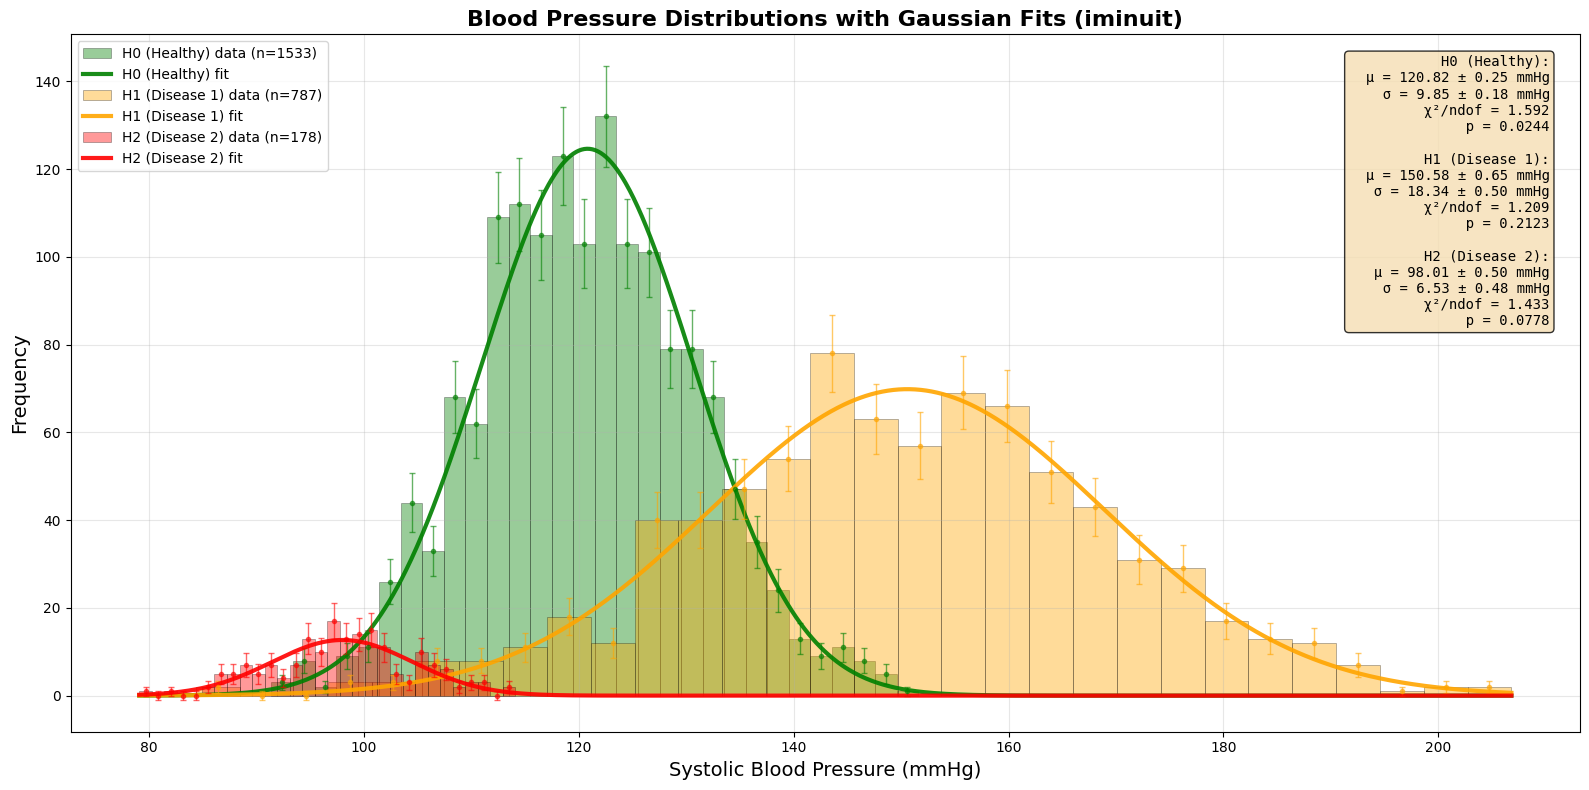


=== Summary Table ===
Group           n        μ (mmHg)           σ (mmHg)           χ²/ndof    p-value   
-------------------------------------------------------------------------------------
H0 (Healthy)    1533     120.82±0.25       9.85±0.18       1.592      0.0244    
H1 (Disease 1)  787      150.58±0.65       18.34±0.50       1.209      0.2123    
H2 (Disease 2)  178      98.01±0.50       6.53±0.48       1.433      0.0778    


In [230]:
# Extract data for each patient type
bloodp_h0 = bloodp[ptype == 0]  # Healthy
bloodp_h1 = bloodp[ptype == 1]  # Disease H1
bloodp_h2 = bloodp[ptype == 2]  # Disease H2

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

# Use same bins for all three groups
bins = 30
x_range = np.linspace(bloodp.min(), bloodp.max(), 1000)

# Store fit results for legend
fit_results = []

# Function to fit and plot each group
def fit_and_plot_group(data, color, label):
    # Get histogram
    counts, bin_edges = np.histogram(data, bins=bins)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    bin_width = bin_edges[1] - bin_edges[0]
    
    # Poisson errors
    counts_err = np.sqrt(counts)
    counts_err[counts_err == 0] = 1
    
    # Plot histogram
    ax.hist(data, bins=bins, alpha=0.4, color=color, 
            edgecolor='black', linewidth=0.5, label=f'{label} data (n={len(data)})')
    
    # Plot error bars on bin centers
    ax.errorbar(bin_centers, counts, yerr=counts_err, 
                fmt='.', color=color, elinewidth=1, capsize=2, alpha=0.6)
    
    # Define Gaussian model
    def gaussian_hist(x, mu, sigma):
        N_total = len(data)
        return N_total * bin_width * stats.norm.pdf(x, mu, sigma)
    
    # Fit using Minuit
    cfit = cost.LeastSquares(bin_centers, counts, counts_err, gaussian_hist)
    mfit = Minuit(cfit, mu=np.mean(data), sigma=np.std(data, ddof=1))
    mfit.migrad()
    
    # Calculate chi2/ndof and p-value
    chi2 = mfit.fval
    ndof = len(bin_centers[counts > 0]) - mfit.nfit
    chi2_ndof = chi2 / ndof
    p_value = stats.chi2.sf(chi2, ndof)
    
    # Plot fitted curve (all solid lines, darker shade)
    ax.plot(x_range, gaussian_hist(x_range, *mfit.values[:]), 
            color=color, linewidth=3, linestyle='-', alpha=0.9,
            label=f'{label} fit')
    
    # Store fit info for legend
    fit_info = {
        'label': label,
        'mu': mfit.values['mu'],
        'mu_err': mfit.errors['mu'],
        'sigma': mfit.values['sigma'],
        'sigma_err': mfit.errors['sigma'],
        'chi2_ndof': chi2_ndof,
        'p_value': p_value
    }
    fit_results.append(fit_info)
    
    # Print fit results
    print(f"\n=== {label} Fit Results ===")
    print(f"μ = {mfit.values['mu']:.2f} ± {mfit.errors['mu']:.2f} mmHg")
    print(f"σ = {mfit.values['sigma']:.2f} ± {mfit.errors['sigma']:.2f} mmHg")
    print(f"χ²/ndof = {chi2:.2f}/{ndof} = {chi2_ndof:.3f}")
    print(f"p-value = {p_value:.4f}")
    
    return mfit

# Fit all three groups
mfit_h0 = fit_and_plot_group(bloodp_h0, 'green', 'H0 (Healthy)')
mfit_h1 = fit_and_plot_group(bloodp_h1, 'orange', 'H1 (Disease 1)')
mfit_h2 = fit_and_plot_group(bloodp_h2, 'red', 'H2 (Disease 2)')

# Create custom legend with fit statistics in 3 columns
legend_text = ""
for result in fit_results:
    legend_text += f"{result['label']}:\n"
    legend_text += f"  μ = {result['mu']:.2f} ± {result['mu_err']:.2f} mmHg\n"
    legend_text += f"  σ = {result['sigma']:.2f} ± {result['sigma_err']:.2f} mmHg\n"
    legend_text += f"  χ²/ndof = {result['chi2_ndof']:.3f}\n"
    legend_text += f"  p = {result['p_value']:.4f}\n\n"

# Add text box with fit statistics
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.98, 0.97, legend_text.strip(), transform=ax.transAxes,
        fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=props, family='monospace')

# Labels and formatting
ax.set_xlabel('Systolic Blood Pressure (mmHg)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Blood Pressure Distributions with Gaussian Fits (iminuit)', 
             fontsize=16, fontweight='bold')
ax.legend(loc='upper left', fontsize=10, ncol=1)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics comparison table
print("\n=== Summary Table ===")
print(f"{'Group':<15} {'n':<8} {'μ (mmHg)':<18} {'σ (mmHg)':<18} {'χ²/ndof':<10} {'p-value':<10}")
print("-" * 85)
for label, mfit, data, result in [('H0 (Healthy)', mfit_h0, bloodp_h0, fit_results[0]),
                                   ('H1 (Disease 1)', mfit_h1, bloodp_h1, fit_results[1]),
                                   ('H2 (Disease 2)', mfit_h2, bloodp_h2, fit_results[2])]:
    print(f"{label:<15} {len(data):<8} "
          f"{mfit.values['mu']:.2f}±{mfit.errors['mu']:.2f}       "
          f"{mfit.values['sigma']:.2f}±{mfit.errors['sigma']:.2f}       "
          f"{result['chi2_ndof']:<10.3f} {result['p_value']:<10.4f}")


=== H0 (Gaussian) Fit Results ===
mu = 120.8223 ± 0.2533
sigma = 9.8466 ± 0.1841
χ²/ndof = 44.56/28 = 1.592
p-value = 0.0244

=== H1 (Gaussian) Fit Results ===
mu = 150.5842 ± 0.6543
sigma = 18.3405 ± 0.4997
χ²/ndof = 31.44/26 = 1.209
p-value = 0.2123

=== H2 (Gaussian) Fit Results ===
mu = 98.0068 ± 0.4971
sigma = 6.5315 ± 0.4761
χ²/ndof = 34.40/24 = 1.433
p-value = 0.0778

=== H0 (Student-t) Fit Results ===
mu = 120.8206 ± 0.2542
sigma = 9.7785 ± 0.1839
nu = 99.9992 ± 97.2639
χ²/ndof = 44.97/27 = 1.665
p-value = 0.0164

=== H1 (Student-t) Fit Results ===
mu = 150.5600 ± 0.6593
sigma = 18.0670 ± 0.7876
nu = 48.7949 ± 65.6792
χ²/ndof = 31.25/25 = 1.250
p-value = 0.1809

=== H2 (Student-t) Fit Results ===
mu = 98.1152 ± 0.4747
sigma = 5.1369 ± 0.5734
nu = 2.1000 ± 0.7464
χ²/ndof = 28.83/23 = 1.253
p-value = 0.1861

=== H0 (Cauchy) Fit Results ===
mu = 120.6107 ± 0.3510
gamma = 6.9709 ± 0.2302
χ²/ndof = 224.05/28 = 8.002
p-value = 0.0000

=== H1 (Cauchy) Fit Results ===
mu = 150.3467 ± 

C:\Users\villa\AppData\Local\Temp\ipykernel_58200\4251304897.py:219: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


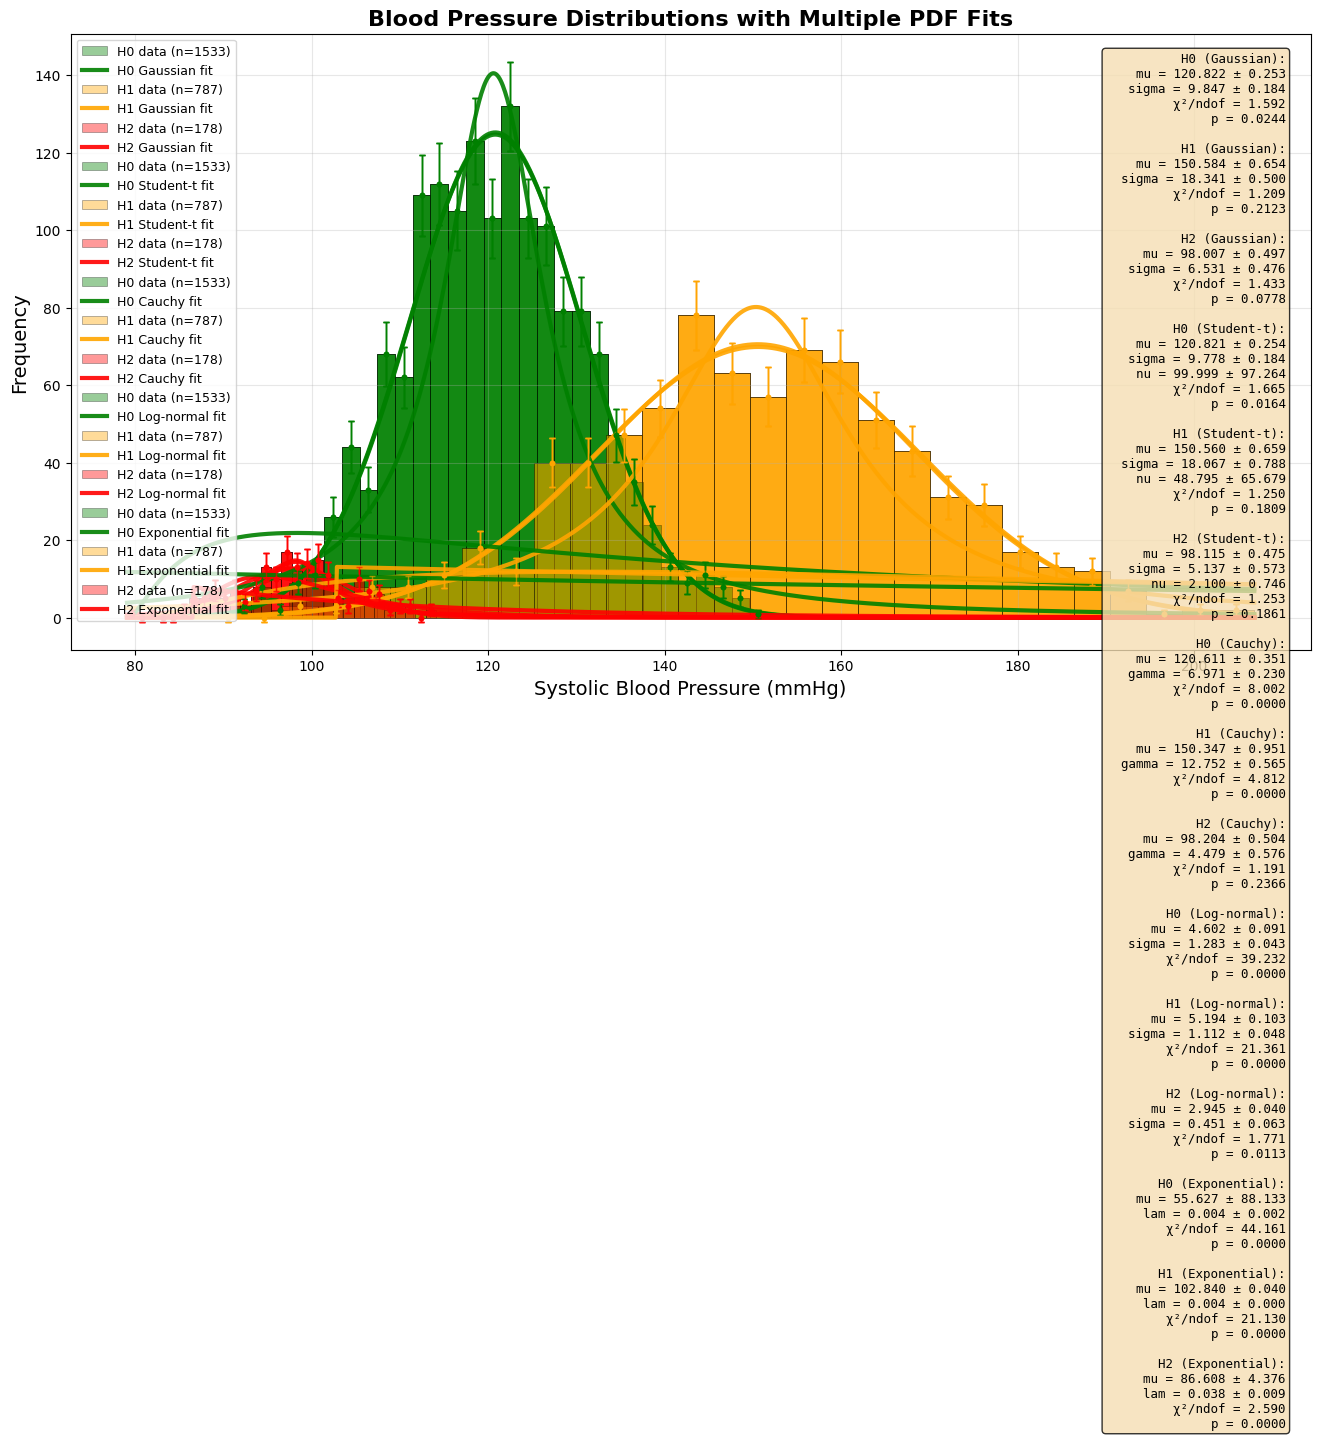


=== Summary Table ===
Group                Model           χ²/ndof    p-value   
------------------------------------------------------------
H0                   Gaussian        1.592      0.0244    
H1                   Gaussian        1.209      0.2123    
H2                   Gaussian        1.433      0.0778    
H0                   Student-t       1.665      0.0164    
H1                   Student-t       1.250      0.1809    
H2                   Student-t       1.253      0.1861    
H0                   Cauchy          8.002      0.0000    
H1                   Cauchy          4.812      0.0000    
H2                   Cauchy          1.191      0.2366    
H0                   Log-normal      39.232     0.0000    
H1                   Log-normal      21.361     0.0000    
H2                   Log-normal      1.771      0.0113    
H0                   Exponential     44.161     0.0000    
H1                   Exponential     21.130     0.0000    
H2                   Exponentia

In [242]:
# Extract data for each patient type
bloodp_h0 = bloodp[ptype == 0]  # Healthy
bloodp_h1 = bloodp[ptype == 1]  # Disease H1
bloodp_h2 = bloodp[ptype == 2]  # Disease H2

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

# Use same bins for all three groups
bins = 30
x_range = np.linspace(bloodp.min(), bloodp.max(), 1000)

# Store fit results for legend
fit_results = []

# ==================== FACTORY FUNCTIONS FOR DIFFERENT PDFs ====================

def make_gaussian_model(N_total, bin_width):
    """Gaussian (Normal) distribution"""
    def model(x, mu, sigma):
        return N_total * bin_width * stats.norm.pdf(x, mu, sigma)
    return model

def make_student_t_model(N_total, bin_width):
    """Student's t-distribution with variable degrees of freedom"""
    def model(x, mu, sigma, nu):
        return N_total * bin_width * stats.t.pdf(x, df=nu, loc=mu, scale=sigma)
    return model

def make_cauchy_model(N_total, bin_width):
    """Cauchy (Lorentz) distribution - heavy tails"""
    def model(x, mu, gamma):
        return N_total * bin_width * stats.cauchy.pdf(x, loc=mu, scale=gamma)
    return model

def make_laplace_model(N_total, bin_width):
    """Laplace (double exponential) distribution"""
    def model(x, mu, b):
        return N_total * bin_width * stats.laplace.pdf(x, loc=mu, scale=b)
    return model

def make_lognormal_model(N_total, bin_width):
    """Log-normal distribution (for positive data)"""
    def model(x, mu, sigma):
        # Shift x to ensure positivity
        x_shifted = x - x.min() + 1e-6
        return N_total * bin_width * stats.lognorm.pdf(x_shifted, s=sigma, scale=np.exp(mu))
    return model

def make_exponential_model(N_total, bin_width):
    """Exponential distribution (for positive data)"""
    def model(x, mu, lam):
        x_shifted = x - mu
        pdf = np.zeros_like(x)
        mask = x_shifted >= 0
        pdf[mask] = stats.expon.pdf(x_shifted[mask], scale=1/lam)
        return N_total * bin_width * pdf
    return model

# ==================== MAIN FITTING FUNCTION ====================

def fit_and_plot_group(data, color, label, pdf_type='gaussian'):
    """
    Fit and plot histogram with chosen PDF
    
    Parameters:
    -----------
    pdf_type : str
        'gaussian', 'student_t', 'cauchy', 'laplace', 'lognormal', 'exponential'
    """
    # Get histogram
    counts, bin_edges = np.histogram(data, bins=bins)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    bin_width = bin_edges[1] - bin_edges[0]
    
    # Poisson errors
    counts_err = np.sqrt(counts)
    counts_err[counts_err == 0] = 1
    
    # Plot histogram
    ax.hist(data, bins=bins, alpha=0.4, color=color, 
            edgecolor='black', linewidth=0.5, label=f'{label} data (n={len(data)})')
    
    ax.errorbar(bin_centers, counts, yerr=counts_err, 
                fmt='.', color=color, elinewidth=1, capsize=2, alpha=0.6)
    
    # Choose model and initial parameters based on pdf_type
    mu_init = np.mean(data)
    sigma_init = np.std(data, ddof=1)
    
    if pdf_type == 'gaussian':
        model = make_gaussian_model(len(data), bin_width)
        mfit = Minuit(cost.LeastSquares(bin_centers, counts, counts_err, model),
                      mu=mu_init, sigma=sigma_init)
        model_name = "Gaussian"
        
    elif pdf_type == 'student_t':
        model = make_student_t_model(len(data), bin_width)
        mfit = Minuit(cost.LeastSquares(bin_centers, counts, counts_err, model),
                      mu=mu_init, sigma=sigma_init, nu=10)
        mfit.limits['nu'] = (2.1, 100)
        model_name = "Student-t"
        
    elif pdf_type == 'cauchy':
        model = make_cauchy_model(len(data), bin_width)
        # Cauchy uses gamma (scale parameter) instead of sigma
        mfit = Minuit(cost.LeastSquares(bin_centers, counts, counts_err, model),
                      mu=mu_init, gamma=sigma_init/2)
        mfit.limits['gamma'] = (0.01, None)
        model_name = "Cauchy"
        
    elif pdf_type == 'laplace':
        model = make_laplace_model(len(data), bin_width)
        # Laplace uses b (scale parameter)
        mfit = Minuit(cost.LeastSquares(bin_centers, counts, counts_err, model),
                      mu=mu_init, b=sigma_init/np.sqrt(2))
        mfit.limits['b'] = (0.01, None)
        model_name = "Laplace"
        
    elif pdf_type == 'lognormal':
        model = make_lognormal_model(len(data), bin_width)
        mfit = Minuit(cost.LeastSquares(bin_centers, counts, counts_err, model),
                      mu=np.log(mu_init), sigma=0.5)
        mfit.limits['sigma'] = (0.01, None)
        model_name = "Log-normal"
        
    elif pdf_type == 'exponential':
        model = make_exponential_model(len(data), bin_width)
        mfit = Minuit(cost.LeastSquares(bin_centers, counts, counts_err, model),
                      mu=data.min(), lam=1/sigma_init)
        mfit.limits['lam'] = (1e-6, None)
        model_name = "Exponential"
        
    else:
        raise ValueError(f"Unknown pdf_type: {pdf_type}")
    
    mfit.migrad()
    
    # Calculate chi2/ndof and p-value
    chi2 = mfit.fval
    ndof = len(bin_centers[counts > 0]) - mfit.nfit
    chi2_ndof = chi2 / ndof
    p_value = stats.chi2.sf(chi2, ndof)
    
    # Plot fitted curve
    ax.plot(x_range, model(x_range, *mfit.values[:]), 
            color=color, linewidth=3, linestyle='-', alpha=0.9,
            label=f'{label} {model_name} fit')
    
    # Store fit info for legend
    fit_info = {
        'label': label,
        'model': model_name,
        'params': {p: (v, e) for p, v, e in zip(mfit.parameters, mfit.values, mfit.errors)},
        'chi2_ndof': chi2_ndof,
        'p_value': p_value
    }
    fit_results.append(fit_info)
    
    # Print fit results
    print(f"\n=== {label} ({model_name}) Fit Results ===")
    for p, v, e in zip(mfit.parameters, mfit.values, mfit.errors):
        print(f"{p} = {v:.4f} ± {e:.4f}")
    print(f"χ²/ndof = {chi2:.2f}/{ndof} = {chi2_ndof:.3f}")
    print(f"p-value = {p_value:.4f}")
    
    return mfit

# ==================== FIT ALL THREE GROUPS ====================
# Try different combinations!
# All Gaussian
mfit_h0 = fit_and_plot_group(bloodp_h0, 'green', 'H0', pdf_type='gaussian')
mfit_h1 = fit_and_plot_group(bloodp_h1, 'orange', 'H1', pdf_type='gaussian')
mfit_h2 = fit_and_plot_group(bloodp_h2, 'red', 'H2', pdf_type='gaussian')

# Mix and match
mfit_h0 = fit_and_plot_group(bloodp_h0, 'green', 'H0', pdf_type='student_t')
mfit_h1 = fit_and_plot_group(bloodp_h1, 'orange', 'H1', pdf_type='student_t')
mfit_h2 = fit_and_plot_group(bloodp_h2, 'red', 'H2', pdf_type='student_t')

# Heavy-tailed distributions
mfit_h0 = fit_and_plot_group(bloodp_h0, 'green', 'H0', pdf_type='cauchy')
mfit_h1 = fit_and_plot_group(bloodp_h1, 'orange', 'H1', pdf_type='cauchy')
mfit_h2 = fit_and_plot_group(bloodp_h2, 'red', 'H2', pdf_type='cauchy')

mfit_h0 = fit_and_plot_group(bloodp_h0, 'green', 'H0', pdf_type='lognormal')
mfit_h1 = fit_and_plot_group(bloodp_h1, 'orange', 'H1', pdf_type='lognormal')
mfit_h2 = fit_and_plot_group(bloodp_h2, 'red', 'H2', pdf_type='lognormal')

mfit_h0 = fit_and_plot_group(bloodp_h0, 'green', 'H0', pdf_type='exponential')
mfit_h1 = fit_and_plot_group(bloodp_h1, 'orange', 'H1', pdf_type='exponential')
mfit_h2 = fit_and_plot_group(bloodp_h2, 'red', 'H2', pdf_type='exponential')



# # ==================== CREATE LEGEND ====================

legend_text = ""
for result in fit_results:
    legend_text += f"{result['label']} ({result['model']}):\n"
    for param, (val, err) in result['params'].items():
        legend_text += f"  {param} = {val:.3f} ± {err:.3f}\n"
    legend_text += f"  χ²/ndof = {result['chi2_ndof']:.3f}\n"
    legend_text += f"  p = {result['p_value']:.4f}\n\n"

# Add text box with fit statistics
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.98, 0.97, legend_text.strip(), transform=ax.transAxes,
        fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=props, family='monospace')

# Labels and formatting
ax.set_xlabel('Systolic Blood Pressure (mmHg)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Blood Pressure Distributions with Multiple PDF Fits', 
             fontsize=16, fontweight='bold')
ax.legend(loc='upper left', fontsize=9, ncol=1)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ==================== SUMMARY TABLE ====================

print("\n=== Summary Table ===")
print(f"{'Group':<20} {'Model':<15} {'χ²/ndof':<10} {'p-value':<10}")
print("-" * 60)
for result in fit_results:
    print(f"{result['label']:<20} {result['model']:<15} "
          f"{result['chi2_ndof']:<10.3f} {result['p_value']:<10.4f}")


=== H0 (Laplace) Fit Results ===
mu = 121.3353 ± 0.2002
b = 8.3344 ± 0.1984
χ²/ndof = 174.66/28 = 6.238
p-value = 0.0000

=== H1 (Cauchy) Fit Results ===
mu = 150.3467 ± 0.9505
gamma = 12.7516 ± 0.5651
χ²/ndof = 125.11/26 = 4.812
p-value = 0.0000

=== H2 (Student-t) Fit Results ===
mu = 98.1152 ± 0.4747
sigma = 5.1369 ± 0.5734
nu = 2.1000 ± 0.7464
χ²/ndof = 28.83/23 = 1.253
p-value = 0.1861


<Figure size 640x480 with 0 Axes>


=== Summary Table ===
Group                Model           χ²/ndof    p-value   
------------------------------------------------------------
H0 (Healthy)         Student-t       1.665      0.0164    
H1 (Disease 1)       Student-t       1.250      0.1809    
H2 (Disease 2)       Student-t       1.253      0.1861    
H0                   Gaussian        1.592      0.0244    
H1                   Gaussian        1.209      0.2123    
H2                   Gaussian        1.433      0.0778    
H0                   Gaussian        1.592      0.0244    
H1                   Student-t       1.250      0.1809    
H2                   Cauchy          1.191      0.2366    
H0                   Laplace         6.238      0.0000    
H1                   Cauchy          4.812      0.0000    
H2                   Student-t       1.253      0.1861    
H0                   Gaussian        1.592      0.0244    
H1                   Gaussian        1.209      0.2123    
H2                   Gaussian  

# Problem 5
## 5.2

In [243]:
dataframe = pd.read_csv('data_RunningTimes.csv', header=0)
dist, t, sigma_t = dataframe.values.T
dataframe

,Distance,time,uncertainty
0,50.0,5.40,0.37
1,60.0,6.25,0.43
2,91.4,9.00,0.59
3,100.0,9.58,0.64
4,150.0,14.35,0.90
5,200.0,19.19,1.16
6,201.2,19.50,1.37
7,300.0,30.69,1.68
8,400.0,43.03,2.20
9,500.0,57.69,2.71


Estimated velocity: 8.44 m/s

Fitted velocity: v = 7.7889 ± 0.0817 m/s

χ²/ndof = 237.24/20 = 11.862
p-value = 0.0000


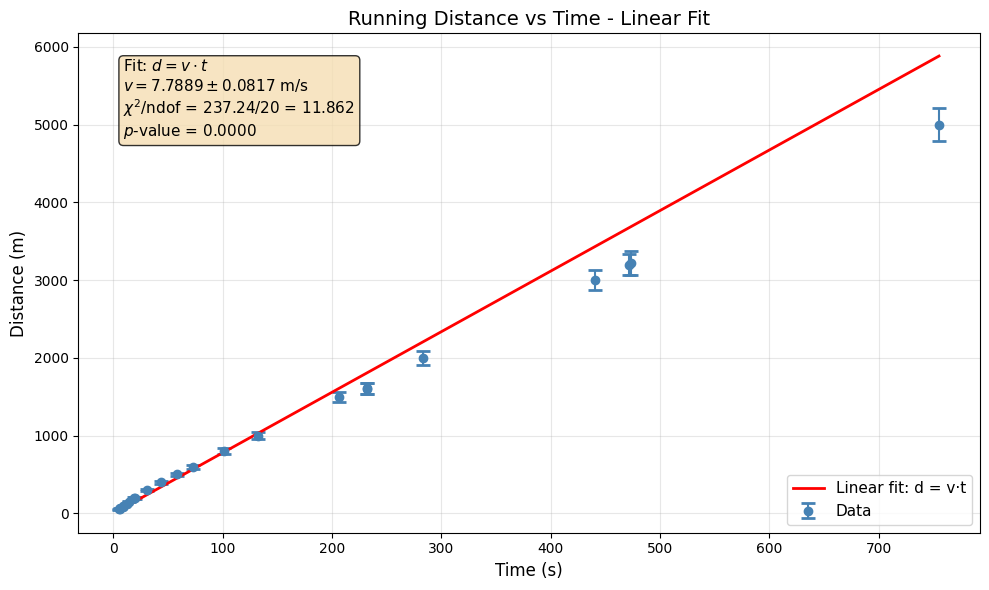

In [247]:

# estimate error on d to get fit
#start wth estimate v
v_estimate = np.mean(dist / t)
print(f"Estimated velocity: {v_estimate:.2f} m/s")

# Convert sigma_t to sigma_d using estimated v
sigma_d = v_estimate * sigma_t

def func_run(t, v):
    return v * t


cfit = cost.LeastSquares(t, dist, sigma_d, func_run)
m = Minuit(cfit, v=v_estimate)
m.migrad()

# Step 5: Get fitted velocity
v_fit = m.values['v']
sigma_v_fit = m.errors['v']

print(f"\nFitted velocity: v = {v_fit:.4f} ± {sigma_v_fit:.4f} m/s")

# Step 6: Recalculate sigma_d with fitted v (optional refinement)
sigma_d_final = np.sqrt((t * sigma_v_fit)**2 + (v_fit * sigma_t)**2)

# Step 7: Calculate chi-square
chi2 = m.fval
ndof = len(t) - m.nfit
chi2_ndof = chi2 / ndof
p_value = stats.chi2.sf(chi2, ndof)

print(f"\nχ²/ndof = {chi2:.2f}/{ndof} = {chi2_ndof:.3f}")
print(f"p-value = {p_value:.4f}")


# Plot with fit info box
fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(t, dist, yerr=sigma_d, fmt='o', color='steelblue', 
            markersize=6, capsize=5, capthick=2, label='Data')

t_smooth = np.linspace(t.min(), t.max(), 100)
ax.plot(t_smooth, func_run(t_smooth, v_fit), 'r-', linewidth=2,
        label='Linear fit: d = v·t')

# Create fit info text
fit_info_text = (
    f'Fit: $d = v \\cdot t$\n'
    f'$v = {v_fit:.4f} \\pm {sigma_v_fit:.4f}$ m/s\n'
    f'$\\chi^2$/ndof = {chi2:.2f}/{ndof} = {chi2_ndof:.3f}\n'
    f'$p$-value = {p_value:.4f}'
)

# Add text box
ax.text(0.05, 0.95, fit_info_text, transform=ax.transAxes,
        fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Distance (m)', fontsize=12)
ax.set_title('Running Distance vs Time - Linear Fit', fontsize=14)
ax.legend(loc='lower right', fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




=== Model Comparison ===
Model           χ²         ndof   χ²/ndof    p-value   
------------------------------------------------------------
Linear          237.24     20     11.862     0.0000    
Deceleration    98.17      19     5.167      0.0000    
Exponential     79.02      19     4.159      0.0000    
Power Law       26.88      19     1.415      0.1076    


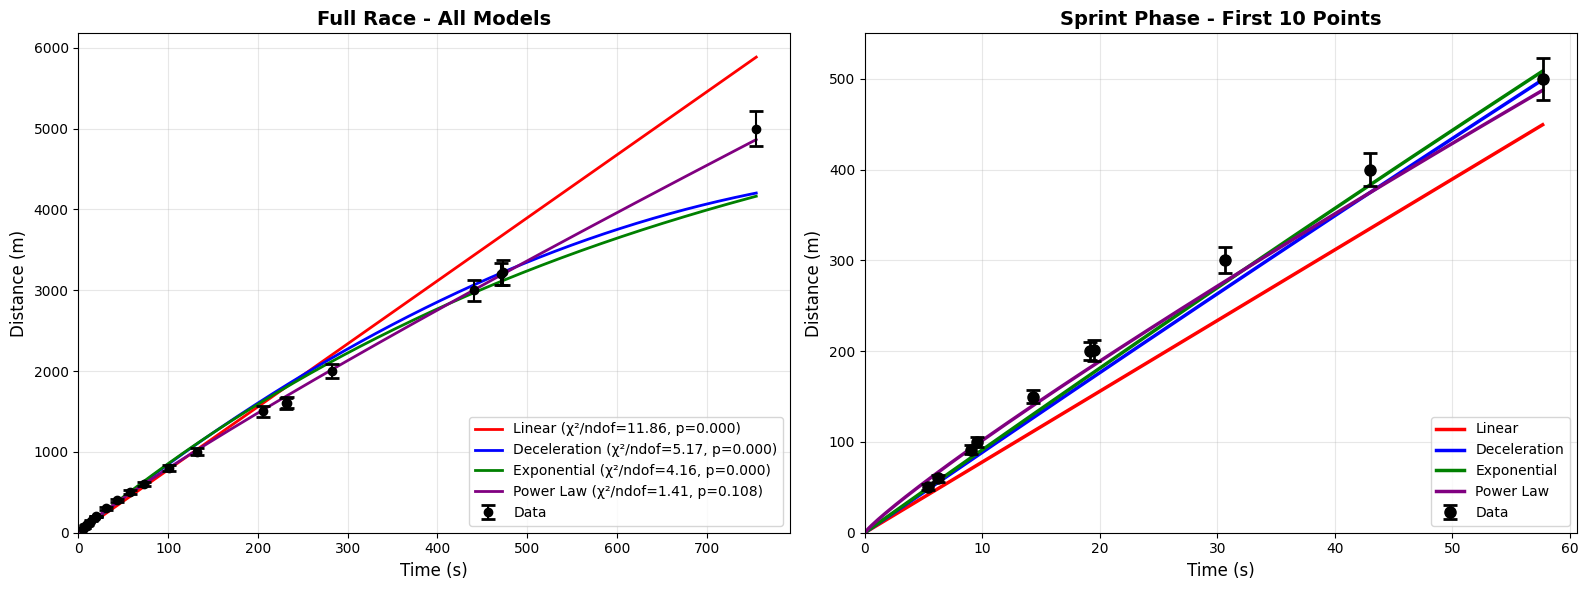

In [267]:
# === Model 1: Constant Deceleration ===
def func_run_decel(t, v0, a):
    return v0 * t - 0.5 * a * t**2

cfit_decel = cost.LeastSquares(t, dist, sigma_d, func_run_decel)
m_decel = Minuit(cfit_decel, v0=7.0, a=0.001)
m_decel.limits['a'] = (0, None)  # Deceleration must be positive
m_decel.migrad()

# === Model 2: Exponential Fatigue ===
def func_run_exp(t, v0, tau):
    return v0 * tau * (1 - np.exp(-t / tau))

cfit_exp = cost.LeastSquares(t, dist, sigma_d, func_run_exp)
m_exp = Minuit(cfit_exp, v0=8.0, tau=200)
m_exp.limits['v0'] = (0, None)
m_exp.limits['tau'] = (1, None)
m_exp.migrad()

# === Model 3: Power Law ===
def func_run_power(t, v0, alpha):
    return v0 * t**(1 - alpha) / (1 - alpha)

cfit_power = cost.LeastSquares(t, dist, sigma_d, func_run_power)
m_power = Minuit(cfit_power, v0=7.0, alpha=0.1)
m_power.limits['v0'] = (0, None)
m_power.limits['alpha'] = (0, 0.99)  # Must be < 1 for d→∞ as t→∞
m_power.migrad()

# === Compare All Models ===
models = [
    ('Linear', m, func_run),
    ('Deceleration', m_decel, func_run_decel),
    ('Exponential', m_exp, func_run_exp),
    ('Power Law', m_power, func_run_power)
]

print("\n=== Model Comparison ===")
print(f"{'Model':<15} {'χ²':<10} {'ndof':<6} {'χ²/ndof':<10} {'p-value':<10}")
print("-" * 60)

for name, minuit, func in models:
    chi2 = minuit.fval
    ndof = len(t) - minuit.nfit
    chi2_ndof = chi2 / ndof
    p_val = stats.chi2.sf(chi2, ndof)
    print(f"{name:<15} {chi2:<10.2f} {ndof:<6} {chi2_ndof:<10.3f} {p_val:<10.4f}")

# # === Plot All Fits ===
# fig, ax = plt.subplots(figsize=(12, 7))

# ax.errorbar(t, dist, yerr=sigma_d, fmt='o', color='black', 
#             markersize=6, capsize=5, capthick=2, label='Data', zorder=10)

# t_smooth = np.linspace(0, t.max(), 500)
# colors = ['red', 'blue', 'green', 'purple']

# for (name, minuit, func), color in zip(models, colors):
#     d_fit = func(t_smooth, *minuit.values[:])
#     chi2_ndof = minuit.fval / (len(t) - minuit.nfit)
#     p_val = stats.chi2.sf(minuit.fval, len(t) - minuit.nfit)
    
#     ax.plot(t_smooth, d_fit, color=color, linewidth=2, 
#             label=f'{name} (χ²/ndof={chi2_ndof:.2f}, p={p_val:.3f})')

# ax.set_xlabel('Time (s)', fontsize=12)
# ax.set_ylabel('Distance (m)', fontsize=12)
# ax.set_title('Running Distance vs Time - Model Comparison', fontsize=14)
# ax.legend(loc='lower right', fontsize=10)
# ax.grid(True, alpha=0.3)
# ax.set_xlim(0, None)
# ax.set_ylim(0, None)
# plt.tight_layout()
# plt.show()

# # === Plot Residuals ===
# fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# axes = axes.flatten()

# for i, (name, minuit, func) in enumerate(models):
#     d_fit = func(t, *minuit.values[:])
#     residuals = dist - d_fit
#     pull = residuals / sigma_d
    
#     axes[i].errorbar(t, residuals, yerr=sigma_d, fmt='o', capsize=5)
#     axes[i].axhline(0, color='red', linestyle='--', linewidth=2)
#     axes[i].set_xlabel('Time (s)')
#     axes[i].set_ylabel('Residuals (m)')
#     axes[i].set_title(f'{name} Model Residuals')
#     axes[i].grid(True, alpha=0.3)
    
#     # Add text with mean and std of pulls
#     mean_pull = np.mean(pull)
#     std_pull = np.std(pull, ddof=1)
#     axes[i].text(0.05, 0.95, f'Mean pull: {mean_pull:.2f}\nStd pull: {std_pull:.2f}',
#                  transform=axes[i].transAxes, verticalalignment='top',
#                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# plt.tight_layout()
# plt.show()

# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# fig, ax = plt.subplots(figsize=(14, 8))

# ax.errorbar(t, dist, yerr=sigma_d, fmt='o', color='black', 
#             markersize=6, capsize=5, capthick=2, label='Data', zorder=10)

# t_smooth = np.linspace(0, t.max(), 500)
# colors = ['red', 'blue', 'green', 'purple']

# for (name, minuit, func), color in zip(models, colors):
#     d_fit = func(t_smooth, *minuit.values[:])
#     chi2_ndof = minuit.fval / (len(t) - minuit.nfit)
#     p_val = stats.chi2.sf(minuit.fval, len(t) - minuit.nfit)
    
#     ax.plot(t_smooth, d_fit, color=color, linewidth=2, 
#             label=f'{name} (χ²/ndof={chi2_ndof:.2f}, p={p_val:.3f})')

# ax.set_xlabel('Time (s)', fontsize=12)
# ax.set_ylabel('Distance (m)', fontsize=12)
# ax.set_title('Running Distance vs Time - Model Comparison', fontsize=14)
# ax.legend(loc='lower right', fontsize=10)
# ax.grid(True, alpha=0.3)
# ax.set_xlim(0, None)
# ax.set_ylim(0, None)

# # === CREATE ZOOMED INSET (top-left corner) ===
# axins = inset_axes(ax, width="35%", height="35%", loc='upper left',
#                    bbox_to_anchor=(0.05, 0.05, 0.9, 0.95),
#                    bbox_transform=ax.transAxes, borderpad=0)

# # Define zoom region (first 5 data points)
# t_zoom_max = np.sort(t)[4]
# mask_zoom = t <= t_zoom_max

# # Plot zoomed data in inset
# axins.errorbar(t[mask_zoom], dist[mask_zoom], yerr=sigma_d[mask_zoom],
#                fmt='o', color='black', markersize=8, capsize=5, 
#                capthick=2, elinewidth=2, zorder=10)

# # Plot zoomed fit curves
# t_smooth_zoom = np.linspace(0, t_zoom_max, 200)
# for (name, minuit, func), color in zip(models, colors):
#     d_fit_zoom = func(t_smooth_zoom, *minuit.values[:])
#     axins.plot(t_smooth_zoom, d_fit_zoom, color=color, linewidth=2)

# axins.grid(True, alpha=0.3)

# # Set zoom limits
# axins.set_xlim(0, t_zoom_max + 5)
# d_zoom_max = dist[mask_zoom].max()
# axins.set_ylim(0, d_zoom_max * 1.15)

# # Inset labels (smaller font)
# axins.tick_params(labelsize=9)
# axins.set_xlabel('Time (s)', fontsize=9)
# axins.set_ylabel('Distance (m)', fontsize=9)

# # Optional: Draw lines connecting inset to zoom region
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", linestyle='--', linewidth=1.5)

# plt.tight_layout()
# plt.show()
# === Plot All Fits with Side-by-Side Zoom ===
fig, (ax_full, ax_zoom) = plt.subplots(1, 2, figsize=(16, 6))

t_smooth = np.linspace(0, t.max(), 500)
colors = ['red', 'blue', 'green', 'purple']

# === LEFT PLOT: Full data ===
ax_full.errorbar(t, dist, yerr=sigma_d, fmt='o', color='black', 
                 markersize=6, capsize=5, capthick=2, label='Data', zorder=10)

for (name, minuit, func), color in zip(models, colors):
    d_fit = func(t_smooth, *minuit.values[:])
    chi2_ndof = minuit.fval / (len(t) - minuit.nfit)
    p_val = stats.chi2.sf(minuit.fval, len(t) - minuit.nfit)
    
    ax_full.plot(t_smooth, d_fit, color=color, linewidth=2, 
                 label=f'{name} (χ²/ndof={chi2_ndof:.2f}, p={p_val:.3f})')

ax_full.set_xlabel('Time (s)', fontsize=12)
ax_full.set_ylabel('Distance (m)', fontsize=12)
ax_full.set_title('Full Race - All Models', fontsize=14, fontweight='bold')
ax_full.legend(loc='lower right', fontsize=10)
ax_full.grid(True, alpha=0.3)
ax_full.set_xlim(0, None)
ax_full.set_ylim(0, None)

# === RIGHT PLOT: Zoomed to first 10 data points ===
# Define zoom region (first 10 data points)
t_zoom_max = np.sort(t)[9]  # 10th smallest time value
mask_zoom = t <= t_zoom_max

# Plot zoomed data
ax_zoom.errorbar(t[mask_zoom], dist[mask_zoom], yerr=sigma_d[mask_zoom],
                 fmt='o', color='black', markersize=8, capsize=5, 
                 capthick=2, elinewidth=2, label='Data', zorder=10)

# Plot zoomed fit curves
t_smooth_zoom = np.linspace(0, t_zoom_max, 200)
for (name, minuit, func), color in zip(models, colors):
    d_fit_zoom = func(t_smooth_zoom, *minuit.values[:])
    ax_zoom.plot(t_smooth_zoom, d_fit_zoom, color=color, linewidth=2.5, 
                 label=name)

ax_zoom.set_xlabel('Time (s)', fontsize=12)
ax_zoom.set_ylabel('Distance (m)', fontsize=12)
ax_zoom.set_title('Sprint Phase - First 10 Points', fontsize=14, fontweight='bold')
ax_zoom.legend(loc='lower right', fontsize=10)
ax_zoom.grid(True, alpha=0.3)
ax_zoom.set_xlim(0, t_zoom_max * 1.05)
ax_zoom.set_ylim(0, dist[mask_zoom].max() * 1.1)

plt.tight_layout()
plt.show()